# Table of Contents

### 0. Understanding the Problem /Data

### 1. Understanding the Datasets & Cleaning for Merging 
 1.1 Cleaning and Merging the three Vehicles datasets & the Additional one for 2019
 
 1.2 Cleaning the Censo dataset 
 
 1.3 Cleaning the Meteo dataset
 
 1.4 Cleaning the Test dataset
 
 1.5 Cleaning the Ventas dataset 
### 2. Merging the datasets 
 2.1 Merging Ventas and Test dataset
 
 2.2 Merging ventas&test with Meteo dataset
 
 2.3 Merging ventas&test&meteo with Census dataset
 
2.3.1 Population of the 10 Closest Municipios Using Geopandas * Haversine Distance

2.3.2 Merging ventas&test&meteo with dataset including new population
 
 2.4 Merging test&meteo&census df with vehicles
### 3. Cleaning the final repsol dataset
 3.1 Normalizing Columns Names and Changing the Type
  
 3.2 Perfom Pandas Profiling
### 4. EDA
4.1 Checking for outliers
 
4.2 Plot Distribution of Features
 
4.3 Plot Demand Holiday vs No Holiday

4.4 Plot Price against Meteological Features

4.5 Checking Distribution of Features per Stations

4.6 Correlation Matrices

4.7 Plot Monthly and Weekly Sales 

4.8 Plot Montly Weather Indicators 

4.9 Plot Time Series for both Products 

4.10 Plot Product Sales per Station
### 5. Feature Creation 
5.1 Creating day column for Time Series Modelling

5.2 Creating sine/cosine Transformation

5.3 Lags 

5.4 Rolling Means 

5.3 Workday Variable

5.4 Season

5.5 Workday Variable

5.6 Season
### 6. Splitting into the dataset for each model
### 7. Final dataset for the models

## 0. Understanding the Problem / Data
Our assignment focuses on creating a monthly and daily sales forecast for service stations spread throughout La Coruña taking into account any variables that might better the accuracy of the model. 

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import seaborn as sns
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import plotly.express as px
import plotly.io as pio

In [3]:
#!pip install statsmodels

## 1. Understanding the Datasets / Merging the Data


### 1.1 Understanding the Datasets & Cleaning for Merging 

In [4]:
df_vehiculos_2016 = pd.read_csv('Comercial_ParqueVehiculos2016.csv', delimiter=";")
df_vehiculos_2017 = pd.read_csv('Comercial_ParqueVehiculos2017.csv', delimiter=";")
df_vehiculos_2018 = pd.read_csv('Comercial_ParqueVehiculos2018.csv', delimiter=";")
df_vehiculos_2019 = pd.read_csv('Comercial_ParqueVehiculos2019.csv', delimiter=";")

In [5]:
df_vehiculos_2018

,PROVINCIAS,MUNICIPIOS,CAMIONES,FURGONETAS,AUTOBUSES,TURISMOS,MOTOCICLETAS,TRACTORES\nINDUSTRIALES,REMOLQUES y\nSEMIRREMOLQUES,OTROS\nVEHÍCULOS,TOTAL
0,Coruña (A),Abegondo,359,265,0,3668,329,38,90,108,4857
1,Coruña (A),Ames,814,827,2,15252,1186,49,124,171,18425
2,Coruña (A),Aranga,96,108,1,1257,75,12,29,33,1611
3,Coruña (A),Ares,120,88,0,2899,240,6,18,38,3409
4,Coruña (A),Arteixo,1743,1165,42,17320,1648,136,284,475,22813
...,...,...,...,...,...,...,...,...,...,...,...
90,Coruña (A),Vilarmaior,53,53,1,886,114,1,12,21,1141
91,Coruña (A),Vilasantar,119,98,0,871,53,2,9,29,1181
92,Coruña (A),Vimianzo,623,410,29,4581,295,55,129,238,6360
93,Coruña (A),Zas,349,212,30,3240,249,24,54,91,4249


In [6]:
df_vehiculos_2019.dropna(inplace=True)
df_vehiculos_2019

,PROVINCIAS,MUNICIPIOS,CAMIONES,FURGONETAS,AUTOBUSES,TURISMOS,MOTOCICLETAS,TRACTORES\nINDUSTRIALES,REMOLQUES y\nSEMIRREMOLQUES,OTROS\nVEHÍCULOS,TOTAL
0,Coruña (A),Abegondo,385.0,281.0,0.0,3716.0,342.0,39.0,91.0,115.0,4969.0
1,Coruña (A),Ames,798.0,864.0,2.0,15809.0,1259.0,48.0,126.0,184.0,19090.0
2,Coruña (A),Aranga,97.0,110.0,1.0,1276.0,72.0,13.0,32.0,34.0,1635.0
3,Coruña (A),Ares,113.0,100.0,0.0,2998.0,259.0,7.0,18.0,41.0,3536.0
4,Coruña (A),Arteixo,1687.0,1223.0,37.0,17796.0,1747.0,142.0,315.0,493.0,23440.0
...,...,...,...,...,...,...,...,...,...,...,...
90,Coruña (A),Vilarmaior,56.0,57.0,1.0,906.0,125.0,3.0,14.0,23.0,1185.0
91,Coruña (A),Vilasantar,116.0,102.0,0.0,899.0,49.0,4.0,8.0,26.0,1204.0
92,Coruña (A),Vimianzo,622.0,421.0,29.0,4667.0,294.0,60.0,140.0,238.0,6471.0
93,Coruña (A),Zas,345.0,231.0,30.0,3237.0,268.0,24.0,54.0,91.0,4280.0


In [7]:
# convert dates into datetime

df_vehiculos_2016["date"] = pd.to_datetime("2016")
df_vehiculos_2016["year"] = df_vehiculos_2016['date'].dt.year
df_vehiculos_2016.drop(columns = "date", inplace=True, axis=1)

df_vehiculos_2017["date"] = pd.to_datetime("2017")
df_vehiculos_2017["year"] = df_vehiculos_2017['date'].dt.year
df_vehiculos_2017.drop(columns = "date", inplace=True, axis=1)

df_vehiculos_2018["date"] = pd.to_datetime("2018")
df_vehiculos_2018["year"] = df_vehiculos_2018['date'].dt.year
df_vehiculos_2018.drop(columns = "date", inplace=True, axis=1)

df_vehiculos_2019["date"] = pd.to_datetime("2019")
df_vehiculos_2019["year"] = df_vehiculos_2019['date'].dt.year
df_vehiculos_2019.drop(columns = "date", inplace=True, axis=1)

In [8]:
# we merge 2017 and 2018 and 2019

df_vehiculos_1 = pd.concat([df_vehiculos_2017, df_vehiculos_2018, df_vehiculos_2019])

In [9]:
# we add camiones and furgonetas since they were as one column in one of the df

df_vehiculos_1['CAMIONES y\nFURGONETAS'] = df_vehiculos_1['CAMIONES'] + df_vehiculos_1['FURGONETAS'] 
df_vehiculos_1 = df_vehiculos_1.drop(["CAMIONES","FURGONETAS"],1)

In [10]:
# merge 2016, 2017, 2018 and 2019

df_vehicles = pd.concat([df_vehiculos_2016, df_vehiculos_1])

In [11]:
df_vehicles

,PROVINCIAS,MUNICIPIOS,CAMIONES y\nFURGONETAS,AUTOBUSES,TURISMOS,MOTOCICLETAS,TRACTORES\nINDUSTRIALES,REMOLQUES y\nSEMIRREMOLQUES,OTROS\nVEHÍCULOS,TOTAL,year
0,Coruña (A),Abegondo,606.0,0.0,3515.0,313.0,34.0,76.0,91.0,4635.0,2016
1,Coruña (A),Ames,1524.0,1.0,14263.0,1053.0,42.0,109.0,155.0,17147.0,2016
2,Coruña (A),Aranga,194.0,1.0,1221.0,70.0,14.0,23.0,34.0,1557.0,2016
3,Coruña (A),Ares,201.0,0.0,2728.0,226.0,5.0,19.0,28.0,3207.0,2016
4,Coruña (A),Arteixo,2827.0,49.0,16303.0,1531.0,130.0,253.0,450.0,21543.0,2016
...,...,...,...,...,...,...,...,...,...,...,...
90,Coruña (A),Vilarmaior,113.0,1.0,906.0,125.0,3.0,14.0,23.0,1185.0,2019
91,Coruña (A),Vilasantar,218.0,0.0,899.0,49.0,4.0,8.0,26.0,1204.0,2019
92,Coruña (A),Vimianzo,1043.0,29.0,4667.0,294.0,60.0,140.0,238.0,6471.0,2019
93,Coruña (A),Zas,576.0,30.0,3237.0,268.0,24.0,54.0,91.0,4280.0,2019


### 1.2 Cleaning the Censo dataset 

In [12]:
df_census = pd.read_csv('Comercial_Censo.csv', delimiter=";")
df_census_2019 = pd.read_csv('Comercial_Censo2019.csv', delimiter=";", usecols = ['Periodo', 'Total'], encoding = 'iso8859_2')
df_census.shape

(96, 12)

In [13]:
df_census['2019'] = df_census_2019['Total']

In [14]:
df_census.drop([0], axis=0, inplace=True)
df_census.head(2)

,Municipio,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2019
1,15001 Abegondo,5.454,5.467,5.533,5.586,5.585,5.664,5.709,5.709,5.765,5.798,5.822,5.406
2,15002 Ames,31.278,30.835,30.544,30.267,29.975,29.689,29.331,28.852,27.900,26.983,25.818,31.793


In [15]:
# make the municipio and year as rows to be able to merge with the main df

df_census = df_census.melt(id_vars=["Municipio"], value_vars=["2019", "2018", "2017", "2016", "2015", "2014", "2013", "2012", "2011", "2010", "2009", "2008"], var_name="year", value_name="Population").sort_values('Municipio')
df_census.head(2)

,Municipio,year,Population
0,15001 Abegondo,2019,5.406
475,15001 Abegondo,2014,5.585


In [16]:
df_census[df_census["Municipio"].str.contains("Coruña, A")]

,Municipio,year,Population
220,"15030 Coruña, A",2017,244.099
30,"15030 Coruña, A",2019,245.711
980,"15030 Coruña, A",2009,246.056
315,"15030 Coruña, A",2016,243.978
125,"15030 Coruña, A",2018,244.850
410,"15030 Coruña, A",2015,243.870
1075,"15030 Coruña, A",2008,245.164
790,"15030 Coruña, A",2011,246.028
695,"15030 Coruña, A",2012,246.146
505,"15030 Coruña, A",2014,244.810


In [17]:
# format the municipio column

df_census["Municipio"] =  np.where(
    df_census["Municipio"] == "15 Coruña, A",
        df_census["Municipio"].str[3:],
        df_census["Municipio"].str[6:]

)
df_census.head(2)

,Municipio,year,Population
0,Abegondo,2019,5.406
475,Abegondo,2014,5.585


In [18]:
df_census[df_census["Municipio"] == "Coruña, A"]

,Municipio,year,Population
220,"Coruña, A",2017,244.099
30,"Coruña, A",2019,245.711
980,"Coruña, A",2009,246.056
315,"Coruña, A",2016,243.978
125,"Coruña, A",2018,244.850
410,"Coruña, A",2015,243.870
1075,"Coruña, A",2008,245.164
790,"Coruña, A",2011,246.028
695,"Coruña, A",2012,246.146
505,"Coruña, A",2014,244.810


In [19]:
df_census['year']=df_census['year'].astype(int)

### 1.3 Cleaning the meteo dataset 

In [20]:
df_meteo = pd.read_csv('Comercial_Meteorologia.csv', delimiter=";")

pd.set_option("display.max_columns", None)
df_meteo.head(2)

,Unnamed: 0,altitud,dir,fecha,horaPresMax,horaPresMin,horaracha,horatmax,horatmin,indicativo,nombre,prec,presMax,presMin,provincia,racha,sol,tmax,tmed,tmin,velmedia
0,0,58,18,2016-01-01,0,11,10:50,13:10,23:59,1387,A CORUA,"7,0","1012,5","998,3",A CORUA,"19,4","1,8","15,3","12,4","9,4","5,8"
1,1,58,22,2016-01-02,11,24,01:20,14:30,06:20,1387,A CORUA,"2,2","1014,3","1006,2",A CORUA,"13,6","5,7","14,0","11,2","8,4","4,2"


In [21]:
df_meteo['fecha'].min(), df_meteo['fecha'].max()

('2016-01-01', '2019-01-31')

In [22]:
df_meteo.columns, df_meteo.shape

(Index(['Unnamed: 0', 'altitud', 'dir', 'fecha', 'horaPresMax', 'horaPresMin',
        'horaracha', 'horatmax', 'horatmin', 'indicativo', 'nombre', 'prec',
        'presMax', 'presMin', 'provincia', 'racha', 'sol', 'tmax', 'tmed',
        'tmin', 'velmedia'],
       dtype='object'),
 (1127, 21))

In [23]:
#convert to date
df_meteo['fecha'] = pd.to_datetime(df_meteo['fecha']) 

#New columns year, month, day
df_meteo['year'] = pd.DatetimeIndex(df_meteo['fecha']).year
df_meteo['month'] = pd.DatetimeIndex(df_meteo['fecha']).month 
df_meteo['day'] = pd.DatetimeIndex(df_meteo['fecha']).day 

df_meteo.columns

Index(['Unnamed: 0', 'altitud', 'dir', 'fecha', 'horaPresMax', 'horaPresMin',
       'horaracha', 'horatmax', 'horatmin', 'indicativo', 'nombre', 'prec',
       'presMax', 'presMin', 'provincia', 'racha', 'sol', 'tmax', 'tmed',
       'tmin', 'velmedia', 'year', 'month', 'day'],
      dtype='object')

In [24]:
#dropping Unnamed column

df_meteo.drop(labels = "Unnamed: 0", inplace = True, axis = 1)

# drop useless variables as they are the same in every row

df_meteo.drop(["provincia", "nombre", "dir", "indicativo"], 1, inplace=True)

# drop hourly variables because we don’t have hourly demand date

df_meteo.drop(["horaPresMax", "horaPresMin"], 1, inplace=True)

In [25]:
df_meteo['altitud']

0       58
1       58
2       58
3       58
4       58
        ..
1122    58
1123    58
1124    58
1125    58
1126    58
Name: altitud, Length: 1127, dtype: int64

### 1.4 Cleaning the Test dataset

In [26]:
df_test = pd.read_csv('Comercial_Test.csv', delimiter=";")

# creating new columns

df_test['Year'] = pd.DatetimeIndex(df_test['Dia']).year
df_test['Month'] = pd.DatetimeIndex(df_test['Dia']).month 
df_test['Day'] = pd.DatetimeIndex(df_test['Dia']).day 
df_test['Weekday'] = pd.DatetimeIndex(df_test['Dia']).weekday 

# renaming fecha

df_test = df_test.rename(columns={'Dia': 'fecha'})
df_test['fecha'] = pd.to_datetime(df_test['fecha']) 

# dropping unnamed, dummifying fiesta

df_test.drop('Unnamed: 0', inplace = True, axis = 1)
df_test['Fiesta'] = np.where(((df_test['Day'] == 1) | (df_test['Day'] == 6)), 1, 0)
df_test["Three_Kings"] = np.where(((df_test['Day'] == 1)& (df_test["Month"] == 1)) |((df_test['Day'] == 3)& (df_test["Month"] == 1)) |((df_test['Day'] == 6)& (df_test["Month"] == 1)),1,0)
df_test["1st_Jan"] = np.where(((df_test['Day'] == 1)& (df_test["Month"] == 1)),1,0)
df_test["3rd_Jan"] = np.where(((df_test['Day'] == 3)& (df_test["Month"] == 1)),1,0)
df_test["6th_Jan"] = np.where(((df_test['Day'] == 6)& (df_test["Month"] == 1)),1,0)


df_test.head(2)

,fecha,Producto,Latitud,Longitud,PVP,VentasN,Nombre,Year,Month,Day,Weekday,Fiesta,Three_Kings,1st_Jan,3rd_Jan,6th_Jan
0,2019-01-01,95,"43,31748953","-8,47923782","1,199","0,0939126888063492",ES4,2019,1,1,1,1,1,1,0,0
1,2019-01-01,GOA,"43,31748953","-8,47923782","1,159","0,233796029661409",ES4,2019,1,1,1,1,1,1,0,0


### 1.5 Cleaning the Ventas dataset 

In [27]:
df_ventas = pd.read_csv('Comercial_Ventas.csv', delimiter=";")

# creating the date columns

df_ventas['Year'] = pd.DatetimeIndex(df_ventas['Dia']).year
df_ventas['Month'] = pd.DatetimeIndex(df_ventas['Dia']).month 
df_ventas['Day'] = pd.DatetimeIndex(df_ventas['Dia']).day 
df_ventas['Weekday'] = pd.DatetimeIndex(df_ventas['Dia']).weekday

# dummifying fiesta
df_ventas['Fiesta'] = np.where(df_ventas['Fiesta'].isnull(), 0, 1)
df_ventas["Three_Kings"] = np.where(((df_ventas['Day'] == 1)& (df_ventas["Month"] == 1)) |((df_ventas['Day'] == 3)& (df_ventas["Month"] == 1)) |((df_ventas['Day'] == 6)& (df_ventas["Month"] == 1)),1,0)
df_ventas["1st_Jan"] = np.where(((df_ventas['Day'] == 1)& (df_ventas["Month"] == 1)),1,0)
df_ventas["3rd_Jan"] = np.where(((df_ventas['Day'] == 3)& (df_ventas["Month"] == 1)),1,0)
df_ventas["6th_Jan"] = np.where(((df_ventas['Day'] == 6)& (df_ventas["Month"] == 1)),1,0)


# renaming fecha for merging

df_ventas = df_ventas.rename(columns={'Dia': 'fecha'})
df_ventas['fecha'] = pd.to_datetime(df_ventas['fecha']) 

df_ventas.head(2)

,fecha,Producto,Latitud,Longitud,PVP,VentasN,Nombre,Day,Month,Year,Weekday,Fiesta,Three_Kings,1st_Jan,3rd_Jan,6th_Jan
0,2016-01-01,95,"43,31748953","-8,47923782","1,169","0,05074742",ES4,1,1,2016,4,1,1,1,0,0
1,2016-01-01,GOA,"43,31748953","-8,47923782","1,009","0,186169968",ES4,1,1,2016,4,1,1,1,0,0


In [29]:
# Checking for missing values
df_ventas.isnull().sum()

fecha             0
Producto          0
Latitud           1
Longitud          1
PVP            1224
VentasN          16
Nombre            0
Day               0
Month             0
Year              0
Weekday           0
Fiesta            0
Three_Kings       0
1st_Jan           0
3rd_Jan           0
6th_Jan           0
dtype: int64

In [30]:
# Checking which station had missing values in their prices 
df_ventas[df_ventas['PVP'].isnull()]['Nombre'].unique()

array(['ES8', 'ES3', 'ES10', 'ES7'], dtype=object)

from Jan 1st 2016 to May 12th 2016 we have missing values in the price of 4 stations fro both products 95 and GOA 

In [31]:
# check the date range for missing values in PVP for station ES8, ES3, ES10, ES7

for station in df_ventas[df_ventas['PVP'].isnull()]['Nombre'].unique():
    print({station}, {df_ventas[(df_ventas['PVP'].isnull()) & (df_ventas['Nombre'] == 'ES8')]['fecha'].min()}), 
    print({station}, {df_ventas[(df_ventas['PVP'].isnull()) & (df_ventas['Nombre'] == 'ES8')]['fecha'].max()}),

{'ES8'} {Timestamp('2016-01-01 00:00:00')}
{'ES8'} {Timestamp('2016-12-05 00:00:00')}
{'ES3'} {Timestamp('2016-01-01 00:00:00')}
{'ES3'} {Timestamp('2016-12-05 00:00:00')}
{'ES10'} {Timestamp('2016-01-01 00:00:00')}
{'ES10'} {Timestamp('2016-12-05 00:00:00')}
{'ES7'} {Timestamp('2016-01-01 00:00:00')}
{'ES7'} {Timestamp('2016-12-05 00:00:00')}


## 2. Merging the datasets 

### 2.1 Merging ventas and test dataset

In [32]:
df_ventas_test = pd.concat(
    [df_test, df_ventas])

### 2.2 Merging ventas&test with Meteo dataset

In [33]:
df_ventas_test_meteo =  pd.merge(
    df_ventas_test, df_meteo, how="left", on=["fecha"]
 )
df_ventas_test_meteo.drop(['year', 'month', 'day'], inplace = True, axis = 1)

In [34]:
df_ventas_test_meteo.sort_values('Year')

,fecha,Producto,Latitud,Longitud,PVP,VentasN,Nombre,Year,Month,Day,Weekday,Fiesta,Three_Kings,1st_Jan,3rd_Jan,6th_Jan,altitud,horaracha,horatmax,horatmin,prec,presMax,presMin,racha,sol,tmax,tmed,tmin,velmedia
10050,2016-09-26,95,"43,33364736","-8,40247476","1,199","0,172169331",ES9,2016,9,26,0,0,0,0,0,0,58,19:00,15:00,06:30,"0,6","1018,5","1014,6","7,2","4,3","22,2","18,0","13,8","1,9"
23284,2016-06-11,95,"43,37307585","-8,42789755","1,209","0,239406568",ES10,2016,6,11,5,0,0,0,0,0,58,16:40,14:10,04:40,"0,0","1011,6","1009,3","10,6","9,6","22,9","18,2","13,5","3,6"
23283,2016-05-11,GOA,"43,37307585","-8,42789755","1,089","0,536633901",ES10,2016,5,11,2,0,0,0,0,0,58,08:50,11:40,05:30,"0,8","998,2","995,7","8,9","7,3","18,3","14,2","10,2","2,5"
23282,2016-05-11,95,"43,37307585","-8,42789755","1,209","0,245038899",ES10,2016,5,11,2,0,0,0,0,0,58,08:50,11:40,05:30,"0,8","998,2","995,7","8,9","7,3","18,3","14,2","10,2","2,5"
23281,2016-04-11,GOA,"43,37307585","-8,42789755","1,099","0,796491105",ES10,2016,4,11,0,0,0,0,0,0,58,14:00,11:50,02:00,"4,8","997,4","992,8","15,8","6,3","14,0","9,6","5,2","5,3"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,2019-01-30,95,"43,47224306","-8,16188278","1,259","0,216625925681235",ES12,2019,1,30,2,0,0,0,0,0,58,22:10,20:50,08:10,"20,0","1009,1","991,9","18,3","0,0","13,2","10,7","8,2","5,0"
491,2019-01-29,GOA,"43,47224306","-8,16188278","1,245","0,573359799958759",ES12,2019,1,29,1,0,0,0,0,0,58,10:00,10:30,21:30,"4,6","1012,9","1004,6","19,4","0,5","12,3","10,4","8,4","6,9"
490,2019-01-29,95,"43,47224306","-8,16188278","1,269","0,222500835840856",ES12,2019,1,29,1,0,0,0,0,0,58,10:00,10:30,21:30,"4,6","1012,9","1004,6","19,4","0,5","12,3","10,4","8,4","6,9"
499,2019-01-02,GOA,"43,27471331","-8,52874355","1,149","0,45257390961121",ES8,2019,1,2,2,0,0,0,0,0,58,17:20,12:20,04:40,"0,0","1027,1","1021,7","10,3","8,3","12,3","9,2","6,0","4,2"


### 2.3 Merging ventas&test&meteo with Census dataset

Ventas contains latitud and longitud, whereas Census contains the municpio. We will find which municipio each gas station is in and merge it based on that. 

In [35]:
!pip install geopy

In [36]:
# we format latitud and longitud so geocoders can read it 

df_ventas_test_meteo['Latitud'] = df_ventas_test_meteo['Latitud'].str.replace(',','.')
df_ventas_test_meteo['Longitud'] = df_ventas_test_meteo['Longitud'].str.replace(',','.')

df_ventas_test_meteo.sort_values(by='Latitud', ascending = False, inplace=True)
df_ventas_test_meteo['Longitud'] = df_ventas_test_meteo['Longitud'].fillna(method='ffill')

df_ventas_test_meteo.sort_values(by='Longitud', ascending = False, inplace=True)
df_ventas_test_meteo['Latitud'] = df_ventas_test_meteo['Latitud'].fillna(method='ffill')

In [37]:
# we use geocoders to find the address of each gas station
# geom column contains both latitude and longitud 
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='capstone_repsol')
# combine lat/long into new column -> tuples of strings
df_ventas_test_meteo['geom'] = df_ventas_test_meteo.apply(lambda row: (str(row.Latitud),str(row.Longitud)),axis=1)

In [38]:
df_ventas_test_meteo['Nombre'].replace('ES40', 'ES4', inplace = True)
df_ventas_test_meteo['Nombre'].replace('ES70', 'ES7', inplace = True)

In [39]:
# we create an address df for each of the geom coordinates
coords = {'geom': df_ventas_test_meteo['geom'].unique(),
         'station': df_ventas_test_meteo['Nombre'].unique()}

df_addresses = pd.DataFrame(data = coords)

df_addresses['Address'] = 'a'

for i in range(len(df_addresses)):
    df_addresses['Address'][i] = geolocator.reverse((df_addresses['geom'][i][0], df_addresses['geom'][i][1]))

df_addresses['MUNICIPIOS'] = 'a'

for i in range(len(df_addresses)):
    if 'municipality' in df_addresses['Address'][i].raw['address']:
         df_addresses['MUNICIPIOS'][i] = df_addresses["Address"][i].raw['address'].get('municipality')
    elif 'borough' in df_addresses['Address'][i].raw['address']: 
        df_addresses['MUNICIPIOS'][i] = df_addresses['Address'][i].raw['address'].get('borough')
    elif 'city' in df_addresses['Address'][i].raw['address']:
        df_addresses['MUNICIPIOS'][i] = df_addresses['Address'][i].raw['address'].get('city')
    else:
        df_addresses['MUNICIPIOS'][i] = df_addresses['Address'][i].raw['address'].get('town')              

In [40]:
df_addresses

,geom,station,Address,MUNICIPIOS
0,"(43.27540082, -8.52940773)",ES3,"(Repsol, Autoestrada da Costa da Morte, Marciñ...",Arteixo
1,"(43.27471331, -8.52874355)",ES8,"(Área de servizos de Paiosaco, Autoestrada da ...",Arteixo
2,"(43.31748953, -8.47923782)",ES4,"(Repsol, 9, Avenida Alcalde Manuel Platas Vare...",Arteixo
3,"(43.37307585, -8.42789755)",ES10,"(Petronor, 6, Estrada dos Fortes, Cidade Escol...",A Coruña
4,"(43.33364736, -8.40247476)",ES9,"(Repsol, 106, Avenida Alcalde Alfonso Molina, ...",A Coruña
5,"(43.33886779, -8.39372721)",ES7,"(Estación de Servicio Repsol Eirís, 50, Estrad...",A Coruña
6,"(43.31197376, -8.36521447)",ES5,"(A.S. do Burgo, Área de Servizo do Burgo, A Ma...",Culleredo
7,"(43.34600444, -8.26885678)",ES6,"(Repsol, 1, Seixeda, Osedo, Sada, A Coruña, Ga...",Sada
8,"(43.50287379, -8.22186654)",ES2,"(Repsol, Estrada de Catabois, Catabois, Ferrol...",Ferrol
9,"(43.34128816, -8.20368109)",ES11,"(Repsol, N-651, A Barrosa, Miño, Betanzos, Gal...",Miño


In [41]:
coords

{'geom': array([('43.27540082', '-8.52940773'), ('43.27471331', '-8.52874355'),
        ('43.31748953', '-8.47923782'), ('43.37307585', '-8.42789755'),
        ('43.33364736', '-8.40247476'), ('43.33886779', '-8.39372721'),
        ('43.31197376', '-8.36521447'), ('43.34600444', '-8.26885678'),
        ('43.50287379', '-8.22186654'), ('43.34128816', '-8.20368109'),
        ('43.47224306', '-8.16188278'), ('43.11401346', '-8.14795451')],
       dtype=object),
 'station': array(['ES3', 'ES8', 'ES4', 'ES10', 'ES9', 'ES7', 'ES5', 'ES6', 'ES2',
        'ES11', 'ES12', 'ES1'], dtype=object)}

In [42]:
# formatting the address df 

corrections = {
    'A Coruña': 'Coruña, A'
}
df_addresses.replace({"MUNICIPIOS": corrections},inplace=True)
df_addresses.drop(columns = 'Address', inplace = True, axis = 1)
df_addresses

,geom,station,MUNICIPIOS
0,"(43.27540082, -8.52940773)",ES3,Arteixo
1,"(43.27471331, -8.52874355)",ES8,Arteixo
2,"(43.31748953, -8.47923782)",ES4,Arteixo
3,"(43.37307585, -8.42789755)",ES10,"Coruña, A"
4,"(43.33364736, -8.40247476)",ES9,"Coruña, A"
5,"(43.33886779, -8.39372721)",ES7,"Coruña, A"
6,"(43.31197376, -8.36521447)",ES5,Culleredo
7,"(43.34600444, -8.26885678)",ES6,Sada
8,"(43.50287379, -8.22186654)",ES2,Ferrol
9,"(43.34128816, -8.20368109)",ES11,Miño


### 2.3.1 Population of the 10 Closest Municipios Using Geopandas * Haversine Distance

In [43]:
corrections = {
    'Baña, A':'A Baña'
}

df_census.replace({"Municipio": corrections},inplace=True)

In [44]:
municipio_coords = []
for i in df_census['Municipio'].unique():
    #print(i)
    location = geolocator.geocode(i+', A Coruña')
    #print((location, location.latitude, location.longitude))
    municipio_coords.append([i, location.latitude, location.longitude])

In [45]:
municipio_coords = pd.DataFrame(municipio_coords, columns = ['Municipio', 'Latitud_Muni', 'Longitud_Muni'])

In [46]:
municipio_coords = municipio_coords[municipio_coords.Municipio != 'Cesuras']
municipio_coords = municipio_coords[municipio_coords.Municipio != 'Oza dos Ríos']

In [47]:
df_addresses['Latitud_Muni'] = 0
df_addresses['Longitud_Muni'] = 0
for i in range(len(df_addresses['geom'])):
    df_addresses['Latitud_Muni'][i] = float(df_addresses['geom'][i][0])
    df_addresses['Longitud_Muni'][i] = float(df_addresses['geom'][i][1])

In [48]:
df_addresses["Latitud_Muni"]= df_addresses["Latitud_Muni"].astype(float)
df_addresses["Longitud_Muni"]= df_addresses["Longitud_Muni"].astype(float)

In [49]:
df_addresses['Latitud_rad'] = np.radians(df_addresses['Latitud_Muni'])
df_addresses['Longitud_rad'] = np.radians(df_addresses['Longitud_Muni'])

In [50]:
municipio_coords['Latitud_rad'] = np.radians(municipio_coords['Latitud_Muni'])
municipio_coords['Longitud_rad'] = np.radians(municipio_coords['Longitud_Muni'])

In [51]:
df_addresses

,geom,station,MUNICIPIOS,Latitud_Muni,Longitud_Muni,Latitud_rad,Longitud_rad
0,"(43.27540082, -8.52940773)",ES3,Arteixo,43.0,-8.0,0.750492,-0.139626
1,"(43.27471331, -8.52874355)",ES8,Arteixo,43.0,-8.0,0.750492,-0.139626
2,"(43.31748953, -8.47923782)",ES4,Arteixo,43.0,-8.0,0.750492,-0.139626
3,"(43.37307585, -8.42789755)",ES10,"Coruña, A",43.0,-8.0,0.750492,-0.139626
4,"(43.33364736, -8.40247476)",ES9,"Coruña, A",43.0,-8.0,0.750492,-0.139626
5,"(43.33886779, -8.39372721)",ES7,"Coruña, A",43.0,-8.0,0.750492,-0.139626
6,"(43.31197376, -8.36521447)",ES5,Culleredo,43.0,-8.0,0.750492,-0.139626
7,"(43.34600444, -8.26885678)",ES6,Sada,43.0,-8.0,0.750492,-0.139626
8,"(43.50287379, -8.22186654)",ES2,Ferrol,43.0,-8.0,0.750492,-0.139626
9,"(43.34128816, -8.20368109)",ES11,Miño,43.0,-8.0,0.750492,-0.139626


In [52]:
municipio_coords.reset_index(inplace = True)

In [53]:
del municipio_coords['index']

In [54]:
municipio_coords.head(1)

,Municipio,Latitud_Muni,Longitud_Muni,Latitud_rad,Longitud_rad
0,Abegondo,43.210443,-8.290324,0.754164,-0.144693


In [55]:
df_census.dropna(inplace = True)
df_census['Population'] = df_census['Population'].str.replace('.', '')
df_census['Population'] = df_census['Population'].astype(int)

In [56]:
df_census_muni = pd.merge(
    df_census, municipio_coords, how="inner", on=["Municipio"]
 )

In [57]:
df_census_muni.head(1)

,Municipio,year,Population,Latitud_Muni,Longitud_Muni,Latitud_rad,Longitud_rad
0,Abegondo,2019,5406,43.210443,-8.290324,0.754164,-0.144693


In [58]:
## I think it is not needed
#
#df_census_muni['Latitud_rad'] = np.radians(df_census_muni['Latitud_Muni'])
#df_census_muni['Longitud_rad'] = np.radians(df_census_muni['Longitud_Muni'])
#df_census_muni.head(1)

In [59]:
from sklearn.metrics.pairwise import haversine_distances
lista = []
counter_num = 0
for i in range(len(df_addresses)):
    for u in range(len(municipio_coords)):
        result = haversine_distances([[df_addresses['Latitud_rad'][i], df_addresses['Longitud_rad'][i]], [municipio_coords['Latitud_rad'][u], municipio_coords['Longitud_rad'][u]]])
        result_km = (result * 6371000/1000)[0][1]
        distance_munis = (df_addresses['MUNICIPIOS'][i], df_addresses['station'][i], i+1, municipio_coords['Municipio'][u], result_km)
        lista.append(distance_munis)

In [60]:
distancias_df = pd.DataFrame(lista, columns = ["Station_Muni", "Station", 'Number', "Municipio", "Distance_km"])
distancias_df

,Station_Muni,Station,Number,Municipio,Distance_km
0,Arteixo,ES3,1,Abegondo,33.212718
1,Arteixo,ES3,1,Ames,55.580060
2,Arteixo,ES3,1,Aranga,21.811473
3,Arteixo,ES3,1,Ares,52.623248
4,Arteixo,ES3,1,Arteixo,53.223781
...,...,...,...,...,...
1111,Curtis,ES1,12,Vilarmaior,39.842784
1112,Curtis,ES1,12,Vimianzo,88.517439
1113,Curtis,ES1,12,Zas,74.985795
1114,Curtis,ES1,12,Cariño,82.750123


In [61]:
dist = distancias_df[distancias_df['Number']==1].nsmallest(10, ['Distance_km'])
for i in range (2,13):
    dists = distancias_df[distancias_df['Number']==i].nsmallest(10, ['Distance_km'])
    dist = dist.append(dists)

In [62]:
dist.reset_index(inplace = True)
del dist['index']
del dist['Number']
dist

,Station_Muni,Station,Municipio,Distance_km
0,Arteixo,ES3,Toques,2.792469
1,Arteixo,ES3,Vilasantar,9.226113
2,Arteixo,ES3,Boimorto,10.341570
3,Arteixo,ES3,Curtis,18.321570
4,Arteixo,ES3,Aranga,21.811473
...,...,...,...,...
115,Curtis,ES1,Frades,24.229356
116,Curtis,ES1,Oza-Cesuras,25.019327
117,Curtis,ES1,Mesía,25.515633
118,Curtis,ES1,Boqueixón,26.136512


In [63]:
df_census_muni = df_census_muni.loc[df_census_muni['year'].isin([2016, 2017, 2018, 2019])]
df_census_muni = df_census_muni.loc[df_census_muni['Population'] < 1119351]

In [64]:
df_census_muni

,Municipio,year,Population,Latitud_Muni,Longitud_Muni,Latitud_rad,Longitud_rad
0,Abegondo,2019,5406,43.210443,-8.290324,0.754164,-0.144693
4,Abegondo,2018,5454,43.210443,-8.290324,0.754164,-0.144693
5,Abegondo,2017,5467,43.210443,-8.290324,0.754164,-0.144693
8,Abegondo,2016,5533,43.210443,-8.290324,0.754164,-0.144693
12,Ames,2016,30544,42.866774,-8.658015,0.748166,-0.151111
...,...,...,...,...,...,...,...
1097,Cariño,2016,4072,43.738503,-7.873685,0.763381,-0.137422
1105,Oza-Cesuras,2016,5181,43.173612,-8.195981,0.753522,-0.143047
1107,Oza-Cesuras,2017,5133,43.173612,-8.195981,0.753522,-0.143047
1108,Oza-Cesuras,2018,5155,43.173612,-8.195981,0.753522,-0.143047


In [65]:
dist3 = pd.merge(dist, df_census_muni, how="inner", on="Municipio")
dist3 = dist3[['Station', 'Municipio', 'Distance_km', 'year', 'Population']]

In [66]:
dist4 = dist3.groupby(['year', 'Station'])['Population'].sum()

In [67]:
dist4 = pd.DataFrame(dist4)

In [68]:
dist4.reset_index(inplace = True)

In [69]:
dist4.rename(columns = {'Station':'Nombre', 'year': 'Year', 'Population': 'Population_10_munis'}, inplace = True)

In [70]:
dist4

,Year,Nombre,Population_10_munis
0,2016,ES1,26933
1,2016,ES10,26933
2,2016,ES11,26933
3,2016,ES12,26933
4,2016,ES2,26933
5,2016,ES3,26933
6,2016,ES4,26933
7,2016,ES5,26933
8,2016,ES6,26933
9,2016,ES7,26933


### 2.3.2 Merging ventas&test&meteo with dataset including new population

In [71]:
df_ventas_test_meteo = pd.merge(
    df_ventas_test_meteo, dist4, how="inner", on=["Year", 'Nombre']
 )

In [72]:
del df_addresses['Latitud_Muni']
del df_addresses['Longitud_Muni']
del df_addresses['Latitud_rad']
del df_addresses['Longitud_rad']

In [73]:
# merging address df with our main df

df_ventas_test_meteo_addresses =  pd.merge(
    df_ventas_test_meteo, df_addresses, how="inner", on=["geom"]
 )
del df_ventas_test_meteo_addresses['station']

In [74]:
df_ventas_test_meteo_addresses

,fecha,Producto,Latitud,Longitud,PVP,VentasN,Nombre,Year,Month,Day,Weekday,Fiesta,Three_Kings,1st_Jan,3rd_Jan,6th_Jan,altitud,horaracha,horatmax,horatmin,prec,presMax,presMin,racha,sol,tmax,tmed,tmin,velmedia,geom,Population_10_munis,MUNICIPIOS
0,2018-08-15,95,43.27540082,-8.52940773,"1,329","0,278482531",ES3,2018,8,15,2,1,0,0,0,0,58,17:20,11:20,06:00,"0,0","1012,4","1008,0","7,2","13,5","25,3","21,2","17,2","2,5","(43.27540082, -8.52940773)",26411,Arteixo
1,2018-08-22,GOA,43.27540082,-8.52940773,"1,239","0,644447913",ES3,2018,8,22,2,0,0,0,0,0,58,16:40,12:30,05:20,"0,0","1011,2","1007,1","9,4","11,6","25,3","22,1","18,9","1,7","(43.27540082, -8.52940773)",26411,Arteixo
2,2018-07-14,GOA,43.27540082,-8.52940773,"1,249","0,562232829",ES3,2018,7,14,5,0,0,0,0,0,58,Varias,13:30,05:00,"2,0","1010,9","1009,0","10,0","7,5","24,3","21,0","17,8","2,2","(43.27540082, -8.52940773)",26411,Arteixo
3,2018-07-15,95,43.27540082,-8.52940773,"1,349","0,102531525",ES3,2018,7,15,6,0,0,0,0,0,58,15:40,10:20,23:20,"0,4","1013,4","1009,4","7,5","0,0","19,8","18,6","17,5","3,1","(43.27540082, -8.52940773)",26411,Arteixo
4,2018-07-13,GOA,43.27540082,-8.52940773,"1,259","0,496864346",ES3,2018,7,13,4,0,0,0,0,0,58,19:10,10:20,05:20,"0,0","1009,7","1007,7","8,3","12,9","24,6","21,0","17,3","2,2","(43.27540082, -8.52940773)",26411,Arteixo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27043,2019-01-03,GOA,43.11401346,-8.14795451,"1,159","0,497945577497958",ES1,2019,1,3,3,0,1,0,1,0,58,Varias,14:30,07:20,"0,0","1021,7","1019,9","4,4","8,4","13,6","9,1","4,6","1,7","(43.11401346, -8.14795451)",26168,Curtis
27044,2019-01-03,95,43.11401346,-8.14795451,"1,179","0,0492232168400453",ES1,2019,1,3,3,0,1,0,1,0,58,Varias,14:30,07:20,"0,0","1021,7","1019,9","4,4","8,4","13,6","9,1","4,6","1,7","(43.11401346, -8.14795451)",26168,Curtis
27045,2019-01-02,GOA,43.11401346,-8.14795451,"1,149","0,610743945569206",ES1,2019,1,2,2,0,0,0,0,0,58,17:20,12:20,04:40,"0,0","1027,1","1021,7","10,3","8,3","12,3","9,2","6,0","4,2","(43.11401346, -8.14795451)",26168,Curtis
27046,2019-01-02,95,43.11401346,-8.14795451,"1,189","0,0634663145194393",ES1,2019,1,2,2,0,0,0,0,0,58,17:20,12:20,04:40,"0,0","1027,1","1021,7","10,3","8,3","12,3","9,2","6,0","4,2","(43.11401346, -8.14795451)",26168,Curtis


In [75]:
# formatting the columns we are going to merge on 

df_ventas_test_meteo_addresses.rename(columns = {'Year':'year'}, inplace = True)
df_ventas_test_meteo_addresses.rename(columns = {'MUNICIPIOS':'Municipio'}, inplace = True)


# merging main df with census

df_ventas_test_meteo_addresses_census =  pd.merge(
    df_ventas_test_meteo_addresses, df_census, how="inner", on=["year", "Municipio"]
 )

In [76]:
df_ventas_test_meteo_addresses_census

,fecha,Producto,Latitud,Longitud,PVP,VentasN,Nombre,year,Month,Day,Weekday,Fiesta,Three_Kings,1st_Jan,3rd_Jan,6th_Jan,altitud,horaracha,horatmax,horatmin,prec,presMax,presMin,racha,sol,tmax,tmed,tmin,velmedia,geom,Population_10_munis,Municipio,Population
0,2018-08-15,95,43.27540082,-8.52940773,"1,329","0,278482531",ES3,2018,8,15,2,1,0,0,0,0,58,17:20,11:20,06:00,"0,0","1012,4","1008,0","7,2","13,5","25,3","21,2","17,2","2,5","(43.27540082, -8.52940773)",26411,Arteixo,31917
1,2018-08-22,GOA,43.27540082,-8.52940773,"1,239","0,644447913",ES3,2018,8,22,2,0,0,0,0,0,58,16:40,12:30,05:20,"0,0","1011,2","1007,1","9,4","11,6","25,3","22,1","18,9","1,7","(43.27540082, -8.52940773)",26411,Arteixo,31917
2,2018-07-14,GOA,43.27540082,-8.52940773,"1,249","0,562232829",ES3,2018,7,14,5,0,0,0,0,0,58,Varias,13:30,05:00,"2,0","1010,9","1009,0","10,0","7,5","24,3","21,0","17,8","2,2","(43.27540082, -8.52940773)",26411,Arteixo,31917
3,2018-07-15,95,43.27540082,-8.52940773,"1,349","0,102531525",ES3,2018,7,15,6,0,0,0,0,0,58,15:40,10:20,23:20,"0,4","1013,4","1009,4","7,5","0,0","19,8","18,6","17,5","3,1","(43.27540082, -8.52940773)",26411,Arteixo,31917
4,2018-07-13,GOA,43.27540082,-8.52940773,"1,259","0,496864346",ES3,2018,7,13,4,0,0,0,0,0,58,19:10,10:20,05:20,"0,0","1009,7","1007,7","8,3","12,9","24,6","21,0","17,3","2,2","(43.27540082, -8.52940773)",26411,Arteixo,31917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27043,2019-01-03,GOA,43.11401346,-8.14795451,"1,159","0,497945577497958",ES1,2019,1,3,3,0,1,0,1,0,58,Varias,14:30,07:20,"0,0","1021,7","1019,9","4,4","8,4","13,6","9,1","4,6","1,7","(43.11401346, -8.14795451)",26168,Curtis,3983
27044,2019-01-03,95,43.11401346,-8.14795451,"1,179","0,0492232168400453",ES1,2019,1,3,3,0,1,0,1,0,58,Varias,14:30,07:20,"0,0","1021,7","1019,9","4,4","8,4","13,6","9,1","4,6","1,7","(43.11401346, -8.14795451)",26168,Curtis,3983
27045,2019-01-02,GOA,43.11401346,-8.14795451,"1,149","0,610743945569206",ES1,2019,1,2,2,0,0,0,0,0,58,17:20,12:20,04:40,"0,0","1027,1","1021,7","10,3","8,3","12,3","9,2","6,0","4,2","(43.11401346, -8.14795451)",26168,Curtis,3983
27046,2019-01-02,95,43.11401346,-8.14795451,"1,189","0,0634663145194393",ES1,2019,1,2,2,0,0,0,0,0,58,17:20,12:20,04:40,"0,0","1027,1","1021,7","10,3","8,3","12,3","9,2","6,0","4,2","(43.11401346, -8.14795451)",26168,Curtis,3983


In [77]:
df_ventas_test_meteo_addresses_census.sort_values('Nombre')

,fecha,Producto,Latitud,Longitud,PVP,VentasN,Nombre,year,Month,Day,Weekday,Fiesta,Three_Kings,1st_Jan,3rd_Jan,6th_Jan,altitud,horaracha,horatmax,horatmin,prec,presMax,presMin,racha,sol,tmax,tmed,tmin,velmedia,geom,Population_10_munis,Municipio,Population
27047,2019-01-11,GOA,43.11401346,-8.14795451,"1,199","0,628306044687317",ES1,2019,1,11,4,0,0,0,0,0,58,13:30,12:40,08:40,"0,0","1025,7","1020,1","11,4","8,5","12,1","9,6","7,1","5,3","(43.11401346, -8.14795451)",26168,Curtis,3983
25534,2016-05-31,95,43.11401346,-8.14795451,"1,214","0,077410889",ES1,2016,5,31,1,0,0,0,0,0,58,17:00,11:10,23:50,"0,0","1018,4","1016,3","11,7","12,0","17,6","15,6","13,7","5,3","(43.11401346, -8.14795451)",26933,Curtis,3980
25535,2016-05-30,GOA,43.11401346,-8.14795451,"1,094","0,742213511",ES1,2016,5,30,0,0,0,0,0,0,58,00:10,15:00,05:20,"0,0","1016,6","1011,3","7,8","9,1","19,3","16,6","14,0","3,1","(43.11401346, -8.14795451)",26933,Curtis,3980
25536,2016-05-30,95,43.11401346,-8.14795451,"1,214","0,063461132",ES1,2016,5,30,0,0,0,0,0,0,58,00:10,15:00,05:20,"0,0","1016,6","1011,3","7,8","9,1","19,3","16,6","14,0","3,1","(43.11401346, -8.14795451)",26933,Curtis,3980
25537,2016-05-29,95,43.11401346,-8.14795451,"1,214","0,106907711",ES1,2016,5,29,6,0,0,0,0,0,58,13:10,14:10,02:40,"2,2","1011,8","1006,0","14,2","5,4","19,4","16,4","13,5","5,8","(43.11401346, -8.14795451)",26933,Curtis,3980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12466,2017-12-03,GOA,43.33364736,-8.40247476,"1,159","0,486672036",ES9,2017,12,3,6,0,0,0,0,0,58,18:20,14:00,08:20,"0,0","1026,7","1023,3","7,5","6,4","12,1","8,8","5,4","2,5","(43.33364736, -8.40247476)",26592,"Coruña, A",244099
12465,2017-03-13,95,43.33364736,-8.40247476,"1,279","0,166156068",ES9,2017,3,13,0,0,0,0,0,0,58,00:30,13:10,22:30,Ip,"1026,4","1023,1","13,3","6,8","14,7","12,4","10,1","5,6","(43.33364736, -8.40247476)",26592,"Coruña, A",244099
12464,2017-03-13,GOA,43.33364736,-8.40247476,"1,159","0,656495333",ES9,2017,3,13,0,0,0,0,0,0,58,00:30,13:10,22:30,Ip,"1026,4","1023,1","13,3","6,8","14,7","12,4","10,1","5,6","(43.33364736, -8.40247476)",26592,"Coruña, A",244099
12472,2017-09-03,GOA,43.33364736,-8.40247476,"1,169","0,659596756",ES9,2017,9,3,6,0,0,0,0,0,58,16:50,12:30,05:10,"2,4","1012,5","1006,5","13,1","2,2","22,9","19,4","15,8","4,4","(43.33364736, -8.40247476)",26592,"Coruña, A",244099


In [78]:
df_ventas_test_meteo_addresses_census['Nombre'].replace('ES40', 'ES4', inplace = True)
df_ventas_test_meteo_addresses_census['Nombre'].replace('ES70', 'ES7', inplace = True)

In [79]:
df_ventas_test_meteo_addresses_census['Nombre'].value_counts()

ES4     2254
ES11    2254
ES3     2254
ES5     2254
ES7     2254
ES8     2254
ES1     2254
ES9     2254
ES10    2254
ES6     2254
ES12    2254
ES2     2254
Name: Nombre, dtype: int64

### 2.4 Merging test&meteo&census df with vehicles

In [80]:
df_vehicles.rename(columns = {'MUNICIPIOS':'Municipio'}, inplace = True)

df_ventas_test_meteo_addresses_census_vehicles =  pd.merge(
    df_ventas_test_meteo_addresses_census, df_vehicles, how="inner", on=["year", "Municipio"]
 )

In [81]:
df_repsol = df_ventas_test_meteo_addresses_census_vehicles.copy()

In [82]:
df_repsol.head(10)

,fecha,Producto,Latitud,Longitud,PVP,VentasN,Nombre,year,Month,Day,Weekday,Fiesta,Three_Kings,1st_Jan,3rd_Jan,6th_Jan,altitud,horaracha,horatmax,horatmin,prec,presMax,presMin,racha,sol,tmax,tmed,tmin,velmedia,geom,Population_10_munis,Municipio,Population,PROVINCIAS,CAMIONES y\nFURGONETAS,AUTOBUSES,TURISMOS,MOTOCICLETAS,TRACTORES\nINDUSTRIALES,REMOLQUES y\nSEMIRREMOLQUES,OTROS\nVEHÍCULOS,TOTAL
0,2018-08-15,95,43.27540082,-8.52940773,"1,329","0,278482531",ES3,2018,8,15,2,1,0,0,0,0,58,17:20,11:20,06:00,"0,0","1012,4","1008,0","7,2","13,5","25,3","21,2","17,2","2,5","(43.27540082, -8.52940773)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0
1,2018-08-22,GOA,43.27540082,-8.52940773,"1,239","0,644447913",ES3,2018,8,22,2,0,0,0,0,0,58,16:40,12:30,05:20,"0,0","1011,2","1007,1","9,4","11,6","25,3","22,1","18,9","1,7","(43.27540082, -8.52940773)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0
2,2018-07-14,GOA,43.27540082,-8.52940773,"1,249","0,562232829",ES3,2018,7,14,5,0,0,0,0,0,58,Varias,13:30,05:00,"2,0","1010,9","1009,0","10,0","7,5","24,3","21,0","17,8","2,2","(43.27540082, -8.52940773)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0
3,2018-07-15,95,43.27540082,-8.52940773,"1,349","0,102531525",ES3,2018,7,15,6,0,0,0,0,0,58,15:40,10:20,23:20,"0,4","1013,4","1009,4","7,5","0,0","19,8","18,6","17,5","3,1","(43.27540082, -8.52940773)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0
4,2018-07-13,GOA,43.27540082,-8.52940773,"1,259","0,496864346",ES3,2018,7,13,4,0,0,0,0,0,58,19:10,10:20,05:20,"0,0","1009,7","1007,7","8,3","12,9","24,6","21,0","17,3","2,2","(43.27540082, -8.52940773)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0
5,2018-07-14,95,43.27540082,-8.52940773,"1,349","0,234157842",ES3,2018,7,14,5,0,0,0,0,0,58,Varias,13:30,05:00,"2,0","1010,9","1009,0","10,0","7,5","24,3","21,0","17,8","2,2","(43.27540082, -8.52940773)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0
6,2018-07-13,95,43.27540082,-8.52940773,"1,349","0,162968561",ES3,2018,7,13,4,0,0,0,0,0,58,19:10,10:20,05:20,"0,0","1009,7","1007,7","8,3","12,9","24,6","21,0","17,3","2,2","(43.27540082, -8.52940773)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0
7,2018-08-07,GOA,43.27540082,-8.52940773,"1,275","0,318573224",ES3,2018,8,7,1,0,0,0,0,0,58,14:20,14:50,05:20,"0,0","1010,1","1008,2","9,4","6,7","22,8","19,6","16,4","3,1","(43.27540082, -8.52940773)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0
8,2018-07-24,GOA,43.27540082,-8.52940773,"1,229","0,822977269",ES3,2018,7,24,1,0,0,0,0,0,58,18:50,14:50,23:50,"0,0","1010,5","1008,2","6,4","3,5","23,1","20,6","18,2","2,8","(43.27540082, -8.52940773)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0
9,2018-07-17,95,43.27540082,-8.52940773,"1,349","0,10374159",ES3,2018,7,17,1,0,0,0,0,0,58,16:20,14:40,Varias,"0,0","1014,7","1008,6","11,1","7,1","20,8","18,6","16,3","4,2","(43.27540082, -8.52940773)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0


## 3. Cleaning the final repsol dataset

In [83]:
df_repsol.dtypes

fecha                          datetime64[ns]
Producto                               object
Latitud                                object
Longitud                               object
PVP                                    object
VentasN                                object
Nombre                                 object
year                                    int64
Month                                   int64
Day                                     int64
Weekday                                 int64
Fiesta                                  int64
Three_Kings                             int64
1st_Jan                                 int64
3rd_Jan                                 int64
6th_Jan                                 int64
altitud                                 int64
horaracha                              object
horatmax                               object
horatmin                               object
prec                                   object
presMax                           

In [84]:
df_repsol['PVP'] = df_repsol['PVP'].str.replace('\,', '.')
df_repsol['VentasN'] = df_repsol['VentasN'].str.replace('\,','.')
df_repsol['prec'] = df_repsol['prec'].str.replace('\,', '.')
df_repsol['presMax'] = df_repsol['presMax'].str.replace('\,', '.')
df_repsol['presMin'] = df_repsol['presMin'].str.replace('\,', '.')
df_repsol['racha'] = df_repsol['racha'].str.replace('\,', '.')
df_repsol['sol'] = df_repsol['sol'].str.replace('\,', '.')
df_repsol['tmax'] = df_repsol['tmax'].str.replace('\,', '.')
df_repsol['tmin'] = df_repsol['tmin'].str.replace('\,', '.')
df_repsol['tmed'] = df_repsol['tmed'].str.replace('\,', '.')
df_repsol['velmedia'] = df_repsol['velmedia'].str.replace('\,', '.')

In [85]:
df_repsol.head(3)

,fecha,Producto,Latitud,Longitud,PVP,VentasN,Nombre,year,Month,Day,Weekday,Fiesta,Three_Kings,1st_Jan,3rd_Jan,6th_Jan,altitud,horaracha,horatmax,horatmin,prec,presMax,presMin,racha,sol,tmax,tmed,tmin,velmedia,geom,Population_10_munis,Municipio,Population,PROVINCIAS,CAMIONES y\nFURGONETAS,AUTOBUSES,TURISMOS,MOTOCICLETAS,TRACTORES\nINDUSTRIALES,REMOLQUES y\nSEMIRREMOLQUES,OTROS\nVEHÍCULOS,TOTAL
0,2018-08-15,95,43.27540082,-8.52940773,1.329,0.278482531,ES3,2018,8,15,2,1,0,0,0,0,58,17:20,11:20,06:00,0.0,1012.4,1008.0,7.2,13.5,25.3,21.2,17.2,2.5,"(43.27540082, -8.52940773)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0
1,2018-08-22,GOA,43.27540082,-8.52940773,1.239,0.644447913,ES3,2018,8,22,2,0,0,0,0,0,58,16:40,12:30,05:20,0.0,1011.2,1007.1,9.4,11.6,25.3,22.1,18.9,1.7,"(43.27540082, -8.52940773)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0
2,2018-07-14,GOA,43.27540082,-8.52940773,1.249,0.562232829,ES3,2018,7,14,5,0,0,0,0,0,58,Varias,13:30,05:00,2.0,1010.9,1009.0,10.0,7.5,24.3,21.0,17.8,2.2,"(43.27540082, -8.52940773)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0


In [86]:
df_repsol.dropna(inplace=True, axis=0)

### 3.1 Normalizing Columns Names and Changing the Type 

In [87]:
# renaming the columns
dict_columns = {'fecha': 'date',
               'Producto' : 'product',
               'Latitud': 'latitude',
               'Longitud' : 'longitude',
               'PVP': 'price',
               'VentasN' : 'sales_norm',
               'Nombre' : 'station',
               'Month': 'month',
               'Day': 'day',
               'Weekday' : 'weekday',
               'Fiesta' : 'holiday',
               'Three_Kings':'three_kings',
               'prec': 'rain',
               'presMax' : 'pressure_max',
               'presMin' : 'pressure_min',
               'racha' : 'wind_speed_max',
               'sol' : 'insolation', # confirm if unit is hours of sunlight above 120W/m2
                'tmax' : 'temp_max',
                'tmin' : 'temp_min',
                'tmed' : 'temp_mean',
                'velmedia' : 'wind_speed_mean',
                'geom' : 'coordinates',
                'Municipio' : 'municipality',
                'Population' : 'population',
                'PROVINCIAS' : 'provinces',
                'AUTOBUSES' : 'buses',
                'TURISMOS' : 'car',
                'MOTOCICLETAS' : 'motorbikes',
                'TRACTORES\nINDUSTRIALES' : 'industrial_trucks',
                'REMOLQUES y\nSEMIRREMOLQUES' : 'trailers',
                'OTROS\nVEHÍCULOS' : 'other_vehicles',
                'TOTAL' : 'total_vehicles',
                'CAMIONES y\nFURGONETAS' : 'trucks_and_vans'}
df_repsol.rename(columns=dict_columns,
                inplace=True)

In [88]:
df_repsol.head(4)

,date,product,latitude,longitude,price,sales_norm,station,year,month,day,weekday,holiday,three_kings,1st_Jan,3rd_Jan,6th_Jan,altitud,horaracha,horatmax,horatmin,rain,pressure_max,pressure_min,wind_speed_max,insolation,temp_max,temp_mean,temp_min,wind_speed_mean,coordinates,Population_10_munis,municipality,population,provinces,trucks_and_vans,buses,car,motorbikes,industrial_trucks,trailers,other_vehicles,total_vehicles
0,2018-08-15,95,43.27540082,-8.52940773,1.329,0.278482531,ES3,2018,8,15,2,1,0,0,0,0,58,17:20,11:20,06:00,0.0,1012.4,1008.0,7.2,13.5,25.3,21.2,17.2,2.5,"(43.27540082, -8.52940773)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0
1,2018-08-22,GOA,43.27540082,-8.52940773,1.239,0.644447913,ES3,2018,8,22,2,0,0,0,0,0,58,16:40,12:30,05:20,0.0,1011.2,1007.1,9.4,11.6,25.3,22.1,18.9,1.7,"(43.27540082, -8.52940773)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0
2,2018-07-14,GOA,43.27540082,-8.52940773,1.249,0.562232829,ES3,2018,7,14,5,0,0,0,0,0,58,Varias,13:30,05:00,2.0,1010.9,1009.0,10.0,7.5,24.3,21.0,17.8,2.2,"(43.27540082, -8.52940773)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0
3,2018-07-15,95,43.27540082,-8.52940773,1.349,0.102531525,ES3,2018,7,15,6,0,0,0,0,0,58,15:40,10:20,23:20,0.4,1013.4,1009.4,7.5,0.0,19.8,18.6,17.5,3.1,"(43.27540082, -8.52940773)",26411,Arteixo,31917,Coruña (A),2908.0,42.0,17320.0,1648.0,136.0,284.0,475.0,22813.0


In [89]:
# assigning value 0.0 when the value for column rain was 'Ip' & replacing product 98 by 95
df_repsol["rain"].replace({"Ip": 0.0}, inplace=True)
df_repsol["product"].replace({'98':'95' }, inplace=True)

In [90]:
# changing the types of the columns 
df_repsol["latitude"] = df_repsol["latitude"].astype(float)
df_repsol["longitude"] = df_repsol["longitude"].astype(float)
df_repsol["price"] = df_repsol["price"].astype(float)
df_repsol["sales_norm"] = df_repsol["sales_norm"].astype(float)
df_repsol["rain"] = df_repsol["rain"].astype(float)
df_repsol["pressure_max"] = df_repsol["pressure_max"].astype(float)
df_repsol["pressure_min"] = df_repsol["pressure_min"].astype(float)
df_repsol["wind_speed_max"] = df_repsol["wind_speed_max"].astype(float)
df_repsol["insolation"] = df_repsol["insolation"].astype(float)
df_repsol["temp_max"] = df_repsol["temp_max"].astype(float)
df_repsol["temp_mean"] = df_repsol["temp_mean"].astype(float)
df_repsol["temp_min"] = df_repsol["temp_min"].astype(float)
df_repsol["wind_speed_mean"] = df_repsol["wind_speed_mean"].astype(float)

### 3.2 Perfom Pandas Profiling

In [91]:
#from pandas_profiling import ProfileReport
#report = ProfileReport(df_repsol, title="Pandas Profiling Report", minimal = False)
#report
#profiling = ProfileReport(df_repsol, title="Pandas Profiling Report")

In [92]:
#profiling

## 4. EDA

### 4.1 Checking for Outliers

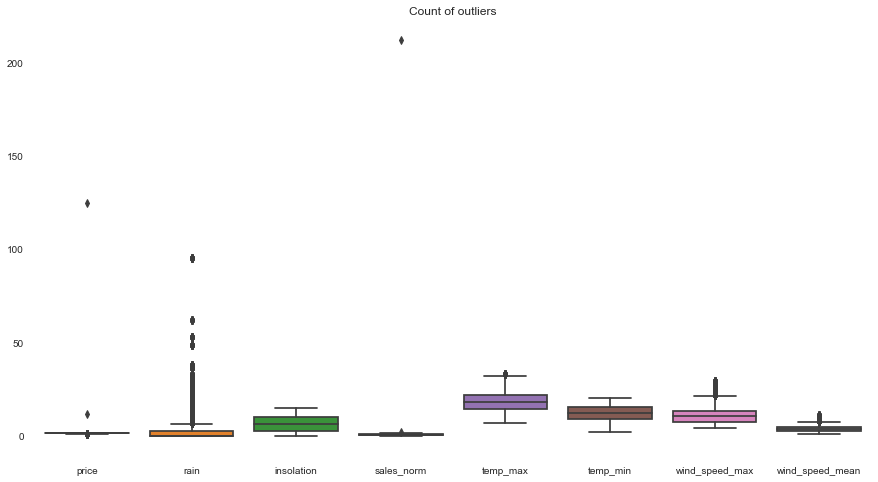

In [93]:
#checking for outliers
fig,ax=plt.subplots(figsize=(15,8))
sns.boxplot(data=df_repsol[['price', 'rain', 'insolation', 'sales_norm', 'temp_max','temp_min', 'wind_speed_max', 'wind_speed_mean']])
ax.set_title('Count of outliers')
plt.show()

In [94]:
#checking sales_norm outliers 
df_repsol.loc[(df_repsol.sales_norm > 1),'sales_norm']
df_repsol.loc[(df_repsol.sales_norm > 1),'sales_norm']= np.nan
df_repsol.dropna(inplace=True)

In [95]:
#checking price outlier 
(df_repsol.loc[:,["price"]]>2).sum()

price    2
dtype: int64

In [96]:
df_repsol = df_repsol[df_repsol["price"]<2]

### 4.2 Plot Distribution of Features

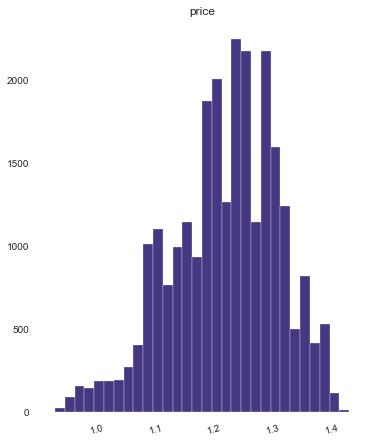

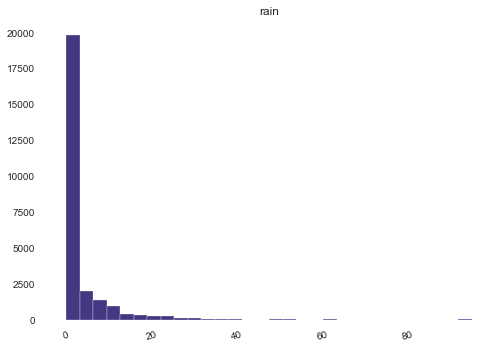

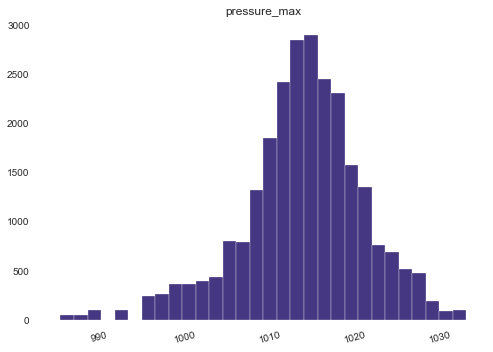

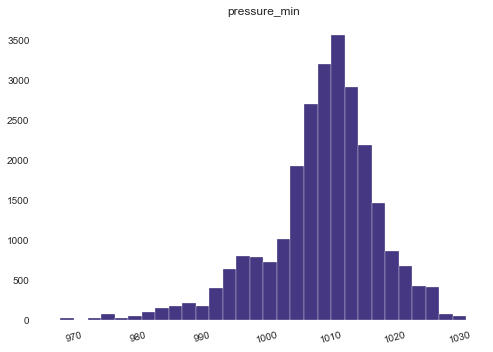

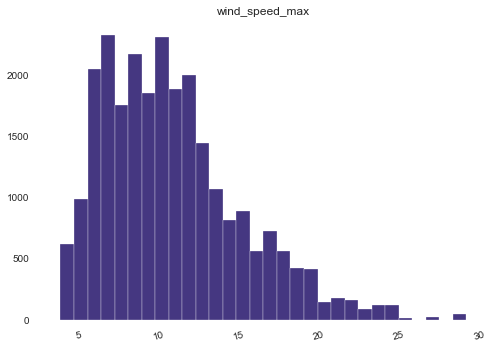

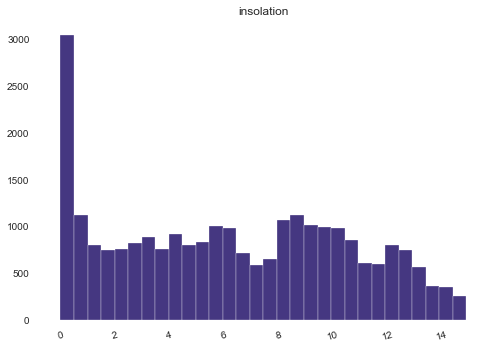

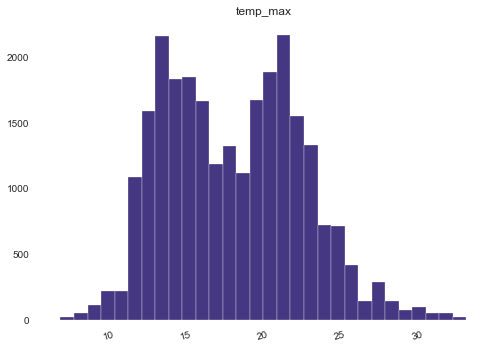

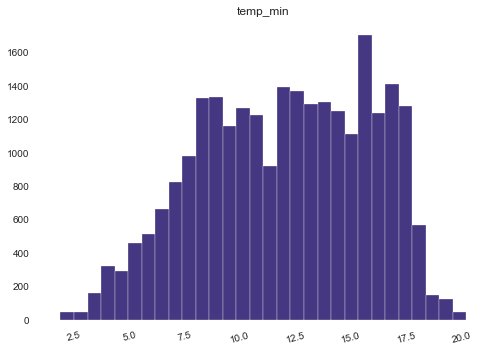

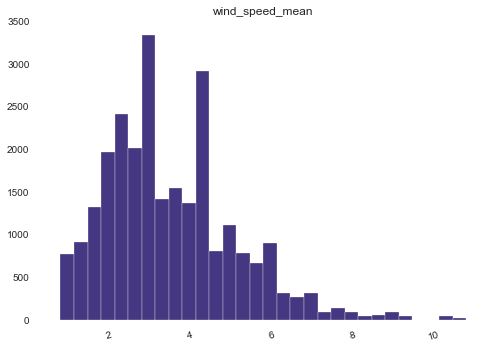

In [97]:
#EDA
initial_features = df_repsol.loc[:,["price", "rain", "pressure_max", "pressure_min", 
                                    "wind_speed_max", "insolation", "temp_max", "temp_min", 
                                    "wind_speed_mean"]].columns
initial_features
fig=plt.figure(figsize=(20,30))
columns = 4
rows = 5
fig.tight_layout()
color = "turquoise"
rng_column = zip(range(1, 12), df_repsol[initial_features])
for ax, column in rng_column:
    fig.add_subplot(rows, columns, ax)
    fig.tight_layout(pad=2)
    if column == "sales_norm":
           plt.hist(df_repsol[initial_features].loc[:, column].dropna(0), bins=30, color="#1F968Bff", alpha=.8)
           plt.title(column)
    else:
        plt.hist(df_repsol[initial_features].loc[:, column].dropna(0), bins=30, color="#453781FF")
        plt.title(column)
        plt.tick_params("x", rotation=15)
        plt.show()

In [98]:
df_repsol.rename(columns = {'weekday_x':'weekday'}, inplace = True)

### 4.3 Plot Demand Holiday vs No Holiday 

In [99]:
sales_holidays = df_repsol[["holiday", "sales_norm"]].set_index("holiday").groupby(["holiday"]).mean("sales_norm")
sales_holidays.reset_index(inplace=True)
fig = px.bar(sales_holidays, x="holiday", y="sales_norm",
             title="Average Sales for non holidays vs holidays"
)
fig.show(renderer = 'iframe')

### 4.4 Plot Price against Meteological Features

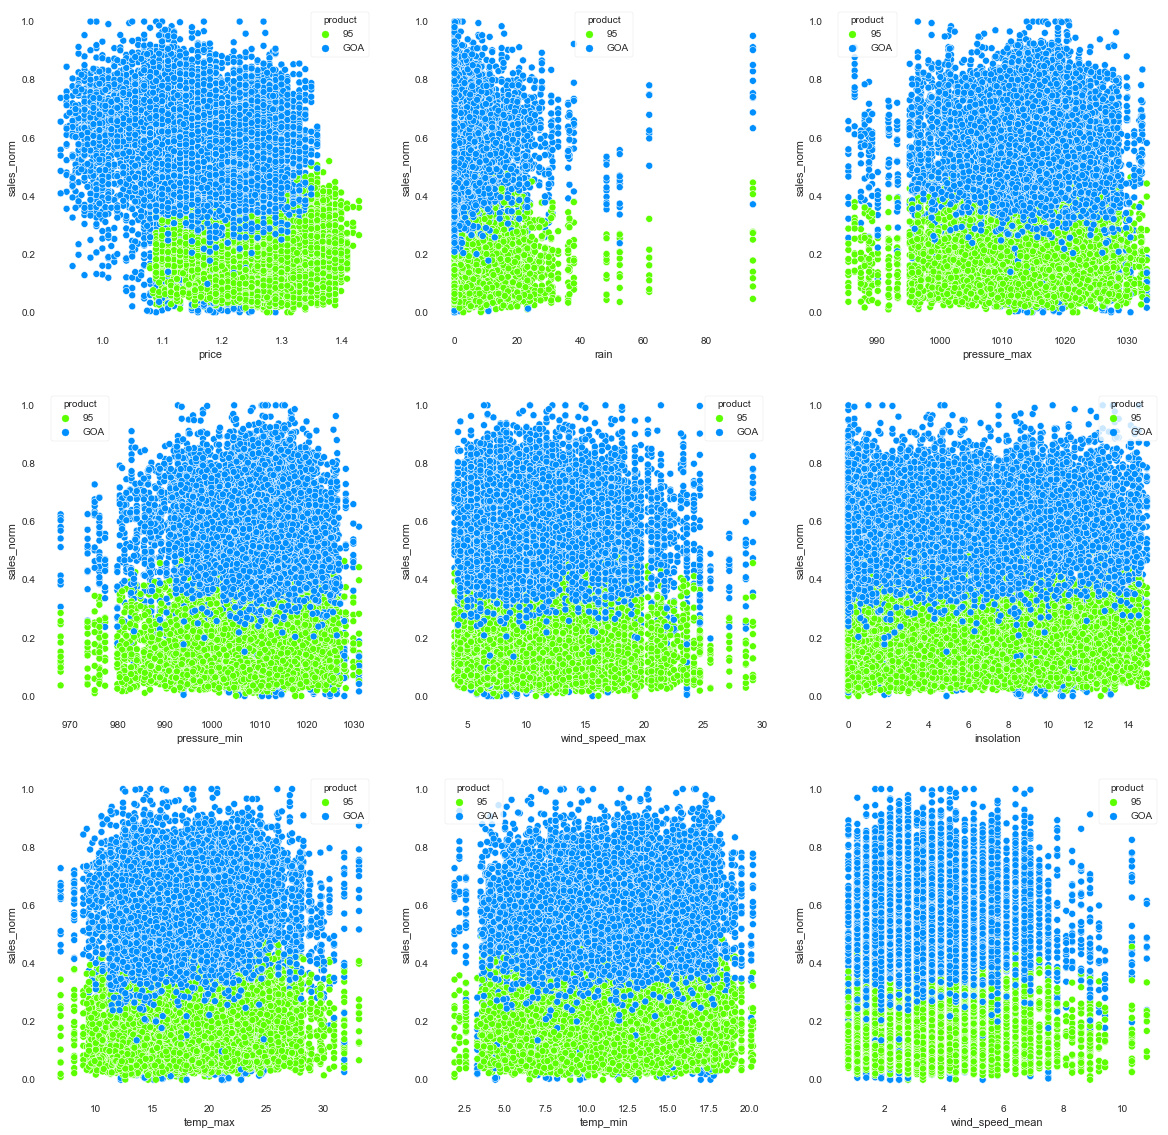

In [100]:
plot_features = ["price", "rain", "pressure_max", "pressure_min", "wind_speed_max", "insolation", "temp_max", "temp_min", "wind_speed_mean"]
fig, ax = plt.subplots (3,3, figsize=(20,20))

for column, ax in zip(plot_features, ax.ravel()):
    sns.scatterplot(data=df_repsol, x=column, y= df_repsol.sales_norm, hue ="product", ax=ax, palette = "gist_rainbow")

### 4.5 Checking Distribution of Features per Stations

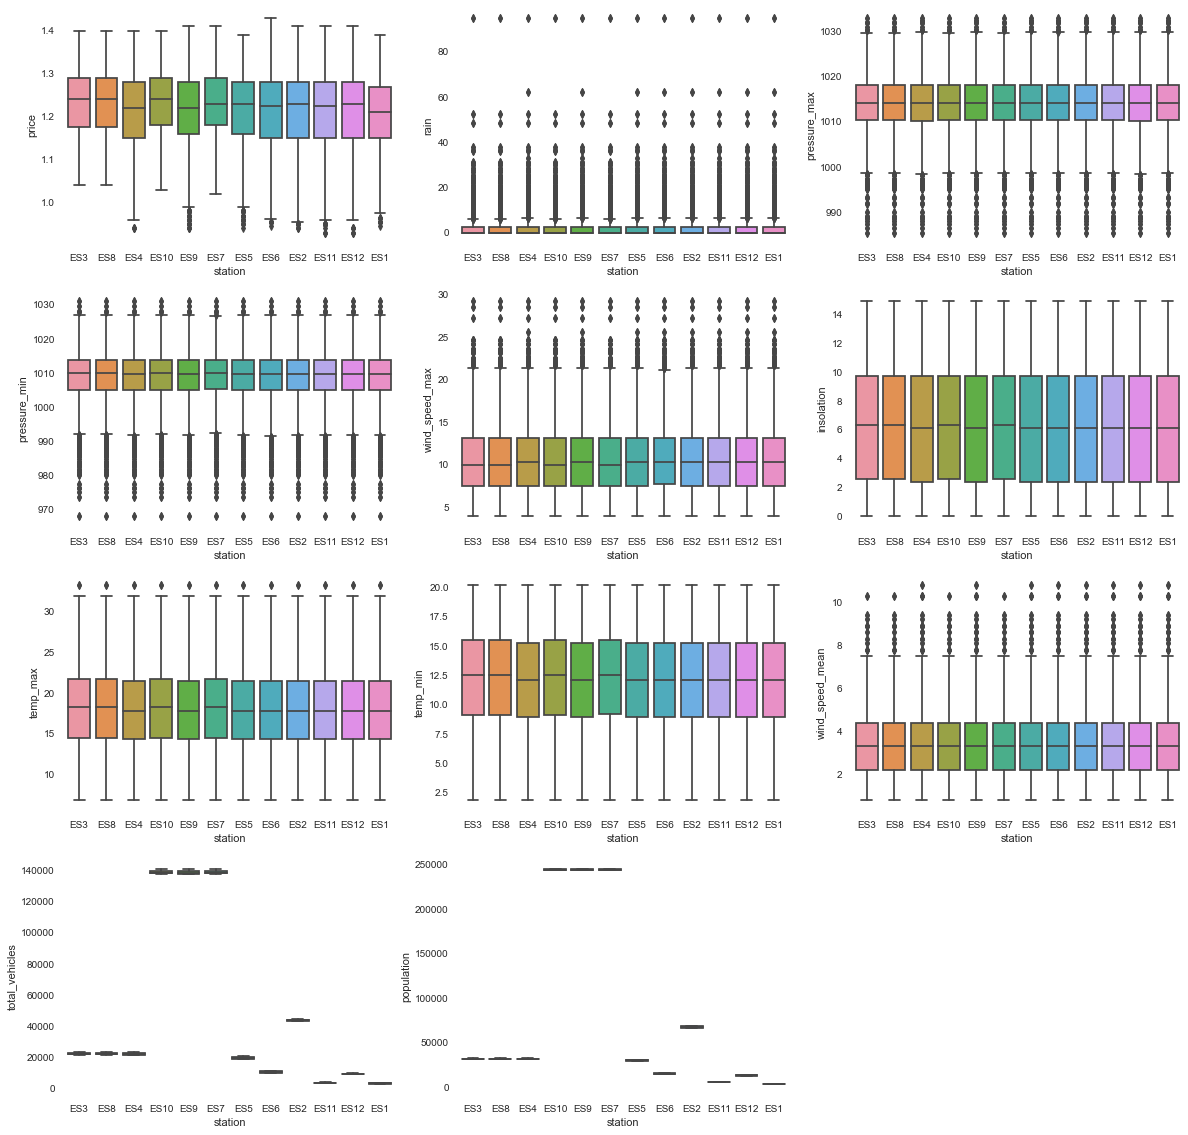

In [101]:
plot_features = ["price", "rain", "pressure_max", "pressure_min", "wind_speed_max", "insolation", "temp_max", "temp_min", "wind_speed_mean", "total_vehicles",'population']
    
fig, ax = plt.subplots (4, 3, figsize=(20,20))
fig.delaxes(ax[3][2])

for column, ax in zip (plot_features, ax.ravel()):
    sns.boxplot(x=df_repsol["station"], y=column, ax=ax, data=df_repsol)
    

### 4.6 Correlation Matrices 

Correlation table between the regressors. Do we have multicollinearity between the external variables?

Correlation table between the regressors and the target (For each product)?

In [102]:
df_repsol_95 = df_repsol[df_repsol["product"] == "95"]
df_repsol_numerical_variables_95 = df_repsol_95[["sales_norm","rain","price","insolation","pressure_max","pressure_min","population"]]

<AxesSubplot:>

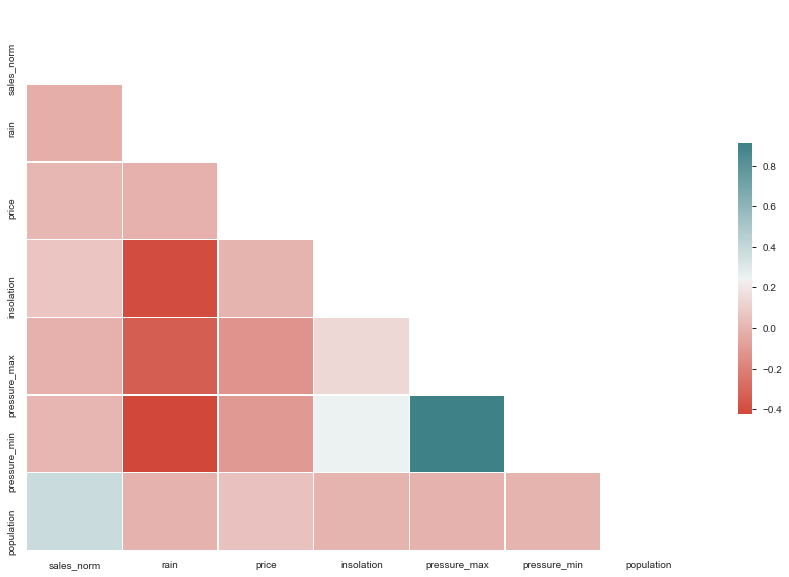

In [103]:
corr = df_repsol_numerical_variables_95.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style(style = 'white')
fig, ax = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(15, 200, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, linewidths=.3, cbar_kws={"shrink": .5}, ax=ax)

In [104]:
df_repsol_GOA = df_repsol[df_repsol["product"] == "GOA"]
df_repsol_numerical_variables_GOA = df_repsol_GOA[["sales_norm","rain","price","insolation","pressure_max","pressure_min","population"]]

<AxesSubplot:>

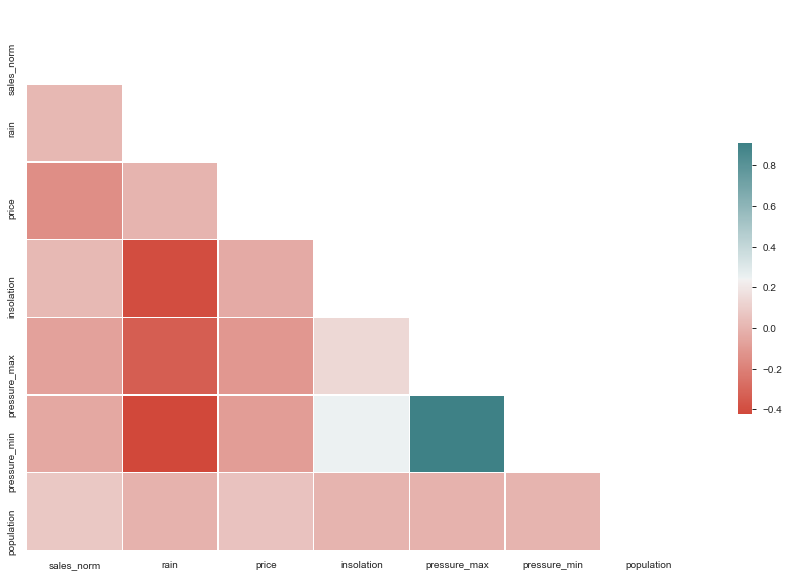

In [105]:
corr = df_repsol_numerical_variables_GOA.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style(style = 'white')
fig, ax = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(15, 200, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, linewidths=.3, cbar_kws={"shrink": .5}, ax=ax)

### 4.7 Plot Monthly and Weekly Sales 

In [106]:
sales_month = df_repsol.copy()

In [165]:
import datetime as dt
# Plotting 95 Monthly Sales (removing the year 2019 as it is only for test set and we only have the month of Janurary)

sales_month_95 = sales_month[(sales_month["product"] == "95") & (sales_month['year'] != 2019)]
sales_month_95["month"] = sales_month_95["date"].dt.month
sales_month_95 = sales_month_95[["date", "month", "sales_norm"]].set_index("month").groupby("month").sum("sales_norm")

In [166]:
import plotly.express as px

fig = px.line(sales_month_95, x=sales_month_95.index, y="sales_norm",
             title = 'Monthly Sales for Product 95',
             )
fig.update_layout(
    font=dict(
        size=18
    )
)

fig.show(renderer = 'iframe')

In [167]:
# Plotting GOA Monthly Sales (removing the year 2019 as it is only for test set and we only have the month of Janurary)

sales_month_GOA = sales_month[(sales_month["product"] == "GOA") & (sales_month['year'] != 2019)]
sales_month_GOA["month"] = sales_month_GOA["date"].dt.month
sales_month_GOA = sales_month_GOA[["date", "month", "sales_norm"]].set_index("month").groupby("month").sum("sales_norm")

In [168]:
import plotly.express as px

fig = px.line(sales_month_GOA, x=sales_month_GOA.index, y="sales_norm",
             title = 'Monthly Sales for Product GOA')
fig.update_layout(
    font=dict(
        size=18
    )
)
fig.show(renderer = 'iframe')

In [111]:
sales_week = df_repsol.copy()

In [169]:
# Plotting 95 Weekly sales (removing the year 2019 as it is only for test set and we only have the month of Janurary)

sales_week_95 = sales_week[(sales_week["product"] == "95") & (sales_month['year'] != 2019)]
sales_week_95["week"] = sales_week_95["date"].dt.week
sales_week_95 = sales_week_95[["date", "week", "sales_norm"]].set_index("week").groupby("week").sum("sales_norm")

In [170]:
import plotly.express as px

fig = px.line(sales_week_95, x=sales_week_95.index, y="sales_norm",
             title = 'Weekly Sales for Product 95'
             )
fig.update_layout(
    font=dict(
        size=18
    )
)
fig.show(renderer = 'iframe')

In [171]:
# Plotting GOA Weekly Sales (removing the year 2019 as it is only for test set and we only have the month of Janurary)

sales_week_GOA = sales_week[(sales_week["product"] == "GOA") & (sales_month['year'] != 2019)]
sales_week_GOA["week"] = sales_week_GOA["date"].dt.week
sales_week_GOA = sales_week_GOA[["date", "week", "sales_norm"]].set_index("week").groupby("week").sum("sales_norm")

In [172]:
import plotly.express as px

fig = px.line(sales_week_GOA, x=sales_week_GOA.index, y="sales_norm",
             title="Weekly Sales for Product GOA"
             )
fig.update_layout(
    font=dict(
        size=18
    )
)
fig.show(renderer = 'iframe')

In [116]:
daily_sales = df_repsol.copy()

In [173]:
# Plotting GOA Daily Sales (removing the year 2019 as it is only for test set and we only have the month of Janurary)


daily_sales_GOA = daily_sales[(daily_sales["product"] == "GOA") & (sales_month['year'] != 2019)]
daily_sales_GOA = daily_sales_GOA[["date", "weekday", "sales_norm",]].set_index("weekday").groupby(["weekday"]).sum("sales_norm")

In [174]:
fig = px.line(daily_sales_GOA, x=daily_sales_GOA.index, y="sales_norm",
             title="Daily Sales for Product GOA"
             )
fig.update_layout(
    font=dict(
        size=18
    )
)
fig.show(renderer = 'iframe')

In [175]:
# Plotting 95 Daily Sales (removing the year 2019 as it is only for test set and we only have the month of Janurary)

daily_sales_95 = daily_sales[(daily_sales["product"] == "95") & (sales_month['year'] != 2019)]
daily_sales_95 = daily_sales_95[["date", "weekday", "sales_norm",]].set_index("weekday").groupby(["weekday"]).sum("sales_norm")

In [176]:
fig = px.line(daily_sales_95, x=daily_sales_95.index, y="sales_norm",
             title="Daily Sales for Product 95"
             )
fig.update_layout(
    font=dict(
        size=18
    )
)
fig.show(renderer = 'iframe')

### 4.8 Plot Monthly Weather Indicators 

In [180]:
# plotting Rainfall throuought the year  
df_rain = df_repsol.copy()#['year'] != 2019
df_rain["month"] = df_rain["date"].dt.month
df_rain = df_rain[["date", "month", "rain", 'insolation','temp_mean']].set_index("month").groupby("month").mean("rain")

In [181]:
import plotly.express as px

fig = px.line(df_rain, x=df_rain.index, y=["rain",'insolation','temp_mean'],
             title = 'Monthly Average Weather Condition')
fig.update_layout(
    font=dict(
        size=18
    )
)
fig.show(renderer = 'iframe')

### 4.9 Plot Time Series for both Products 

In [123]:
sales_trend = df_repsol

In [124]:
sales_trend_95= sales_trend[sales_trend["product"] == "95"]
sales_trend_95 = sales_trend_95[["date", "sales_norm"]].set_index("date").groupby("date").sum("sales_norm")

In [125]:
fig = px.line(sales_trend_95, x=sales_trend_95.index, y="sales_norm",
             title="Time Series Total Sales for Product 95"
)
fig.show(renderer = 'iframe')

In [126]:
sales_trend_GOA= sales_trend[sales_trend["product"] == "GOA"]
sales_trend_GOA = sales_trend_GOA[["date", "sales_norm"]].set_index("date").groupby("date").sum("sales_norm")

In [127]:
fig = px.line(sales_trend_GOA, x=sales_trend_GOA.index, y="sales_norm",
              title="Time Series Total Sales for Product GOA"
             )
fig.show(renderer = 'iframe')

### 4.10 Plot Sales per Station

In [128]:
sales_station = df_repsol.copy()

In [129]:
sales_station_95= sales_station[sales_station["product"] == "95"]
sales_station_95 = sales_station_95[["date", "station","sales_norm"]].set_index("date").groupby("station").sum("sales_norm").sort_values(by = "sales_norm", ascending = False,)


In [130]:
fig = px.bar(sales_station_95, x=sales_station_95.index, y='sales_norm',
            title="Total Sales per Station for Product 95"
            )
fig.show(renderer = 'iframe')

In [132]:
sales_station_GOA= sales_station[sales_station["product"] == "GOA"]
sales_station_GOA = sales_station_GOA[["date", "station","sales_norm"]].set_index("date").groupby("station").sum("sales_norm").sort_values(by = "sales_norm", ascending = False)

In [133]:
fig = px.bar(sales_station_GOA, x=sales_station_GOA.index, y='sales_norm',
             title="Total Sales per Station for Product GOA"
            )
fig.show(renderer = 'iframe')

In [134]:
#can we do sth about the colors? 
sales_together = df_repsol[["station","product", "sales_norm"]].set_index("station").groupby(["station", "product"]).sum("sales_norm")
sales_together.reset_index(inplace=True)
fig = px.bar(sales_together, x="station", y="sales_norm", color="product",
             title="Total Sales per Station for both Products 95 & GOA"
            )
fig.update_layout(barmode='group',xaxis={'categoryorder':'total descending'})
fig.show(renderer = 'iframe')

In [135]:
#can we do sth about the colors? 
sales_stations_muni = df_repsol[["station","municipality", "sales_norm"]].set_index("municipality").groupby(["station", "municipality"]).sum("sales_norm")
sales_stations_muni.reset_index(inplace=True)
fig = px.bar(sales_stations_muni, x="municipality", y="sales_norm", color="station",text="station",
             title="Total Sales per Station (Grouped by Municipality )"
            )
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show(renderer = 'iframe')

## 5. Feature Creation

### 5.1 Creating day column for Time Series Modelling

In [136]:
# create a range of dates
range_of_dates = pd.date_range(start= '2016-01-01',
                               end = '2019-01-31')
X = pd.DataFrame(index=range_of_dates)

# create a sequence of day numbers and input them as columns
X['day_nr'] = range(len(X))
X['day_of_year'] = X.index.dayofyear

### 5.2 Creating sine/cosine Transformation

In [137]:
# create the sine/cosine transformations to encode the cyclical time feature into two features
from sklearn.preprocessing import FunctionTransformer
def sin_transformer(period):
	return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))

def cos_transformer(period):
	return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

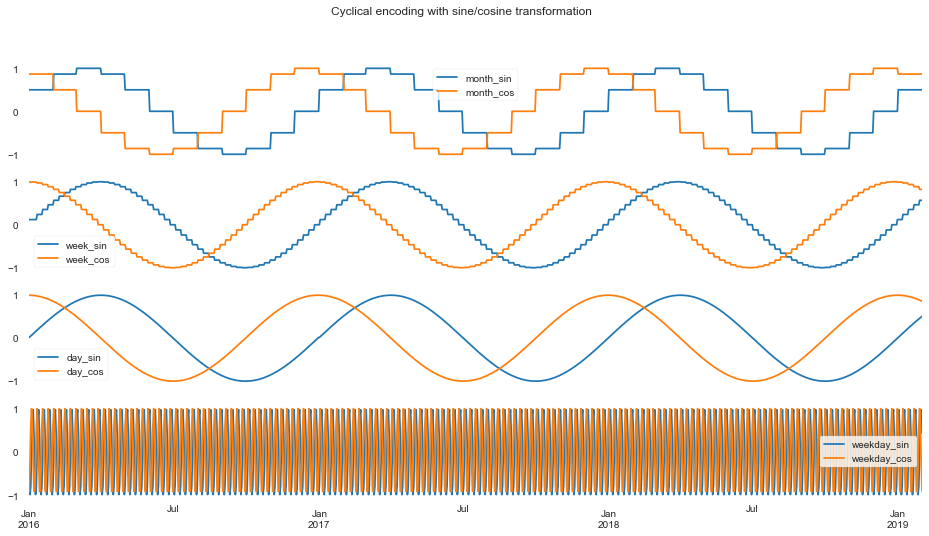

In [138]:
# we create columns with the sine and cosine of the month and day of year
X_2 = X.copy()
X_2['month'] = X_2.index.month
X_2['month_sin'] = sin_transformer(12).fit_transform(X_2)['month']
X_2['month_cos'] = cos_transformer(12).fit_transform(X_2)['month']

X_2['day_sin'] = sin_transformer(365).fit_transform(X_2)['day_of_year']
X_2['day_cos'] = cos_transformer(365).fit_transform(X_2)['day_of_year']

X_2['weekday'] = X_2.index.weekday
X_2['weekday_sin'] = sin_transformer(7).fit_transform(X_2)['weekday']
X_2['weekday_cos'] = cos_transformer(7).fit_transform(X_2)['weekday']

X_2['week'] = X_2.index.week
X_2['week_sin'] = sin_transformer(52).fit_transform(X_2)['week']
X_2['week_cos'] = cos_transformer(52).fit_transform(X_2)['week']

fig, ax = plt.subplots(4, 1, sharex=True, figsize=(16,8))
X_2[['month_sin', 'month_cos']].plot(ax=ax[0])
X_2[['week_sin', 'week_cos']].plot(ax=ax[1])
X_2[['day_sin', 'day_cos']].plot(ax=ax[2])
X_2[['weekday_sin', 'weekday_cos']].plot(ax=ax[3])
plt.suptitle('Cyclical encoding with sine/cosine transformation')
plt.show()

In [139]:
# we merge the new sine and cosine columns into our main df_repsol
X_2.drop(['day_nr', 'month'], axis=1, inplace=True)
# clean fecha column for merge
X_2 = X_2.reset_index()
X_2.rename(columns={'index':'date'}, inplace=True)

# merge based on fecha column
df_repsol =  pd.merge(
   df_repsol, X_2, how='inner', on=['date']
 )

In [140]:
df_repsol.drop("weekday_y", axis=1, inplace=True)

### 5.3 Lags 

New variables: 
- Lag 7: for each product and station we use as predictor variables the sales 7 days before 
- Lag 14 
- Lag 21 
- Lag 28 
- Average of the sales the 7 days before: for each product and station

In [141]:
df_repsol.sort_values(by=["station", "product","date"], inplace=True)
df_repsol.head(8)

,date,product,latitude,longitude,price,sales_norm,station,year,month,day,weekday_x,holiday,three_kings,1st_Jan,3rd_Jan,6th_Jan,altitud,horaracha,horatmax,horatmin,rain,pressure_max,pressure_min,wind_speed_max,insolation,temp_max,temp_mean,temp_min,wind_speed_mean,coordinates,Population_10_munis,municipality,population,provinces,trucks_and_vans,buses,car,motorbikes,industrial_trucks,trailers,other_vehicles,total_vehicles,day_of_year,month_sin,month_cos,day_sin,day_cos,weekday_sin,weekday_cos,week,week_sin,week_cos
14106,2016-01-01,95,43.114013,-8.147955,1.154,0.024927,ES1,2016,1,1,4,1,1,1,0,0,58,10:50,13:10,23:59,7.0,1012.5,998.3,19.4,1.8,15.3,12.4,9.4,5.8,"(43.11401346, -8.14795451)",26933,Curtis,3980,Coruña (A),570.0,7.0,2409.0,183.0,54.0,104.0,80.0,3407.0,1,0.5,0.866025,0.017213,0.999852,-0.433884,-0.900969,53,0.120537,0.992709
14123,2016-01-02,95,43.114013,-8.147955,1.164,0.064939,ES1,2016,1,2,5,0,0,0,0,0,58,01:20,14:30,06:20,2.2,1014.3,1006.2,13.6,5.7,14.0,11.2,8.4,4.2,"(43.11401346, -8.14795451)",26933,Curtis,3980,Coruña (A),570.0,7.0,2409.0,183.0,54.0,104.0,80.0,3407.0,2,0.5,0.866025,0.034422,0.999407,-0.974928,-0.222521,53,0.120537,0.992709
16243,2016-01-03,95,43.114013,-8.147955,1.114,0.069706,ES1,2016,1,3,6,0,1,0,1,0,58,13:20,Varias,00:00,12.0,1006.2,996.9,19.2,0.0,15.6,14.0,12.3,5.8,"(43.11401346, -8.14795451)",26933,Curtis,3980,Coruña (A),570.0,7.0,2409.0,183.0,54.0,104.0,80.0,3407.0,3,0.5,0.866025,0.051620,0.998667,-0.781831,0.623490,53,0.120537,0.992709
14805,2016-01-04,95,43.114013,-8.147955,1.204,0.094124,ES1,2016,1,4,0,0,0,0,0,0,58,15:00,00:00,23:40,11.2,999.9,994.5,17.8,0.0,13.0,11.0,9.1,6.7,"(43.11401346, -8.14795451)",26933,Curtis,3980,Coruña (A),570.0,7.0,2409.0,183.0,54.0,104.0,80.0,3407.0,4,0.5,0.866025,0.068802,0.997630,0.000000,1.000000,1,0.120537,0.992709
15572,2016-01-05,95,43.114013,-8.147955,1.204,0.097476,ES1,2016,1,5,1,0,0,0,0,0,58,Varias,13:50,11:00,7.6,1006.2,998.6,21.4,1.9,11.2,9.5,7.8,10.8,"(43.11401346, -8.14795451)",26933,Curtis,3980,Coruña (A),570.0,7.0,2409.0,183.0,54.0,104.0,80.0,3407.0,5,0.5,0.866025,0.085965,0.996298,0.781831,0.623490,1,0.120537,0.992709
15811,2016-01-06,95,43.114013,-8.147955,1.214,0.109159,ES1,2016,1,6,2,0,1,0,0,1,58,16:40,Varias,02:50,11.2,1006.5,997.5,19.2,0.0,15.0,12.0,9.0,6.4,"(43.11401346, -8.14795451)",26933,Curtis,3980,Coruña (A),570.0,7.0,2409.0,183.0,54.0,104.0,80.0,3407.0,6,0.5,0.866025,0.103102,0.994671,0.974928,-0.222521,1,0.120537,0.992709
11058,2016-01-07,95,43.114013,-8.147955,1.199,0.117059,ES1,2016,1,7,3,0,0,0,0,0,58,02:20,02:40,17:10,95.0,1001.4,995.0,20.3,0.0,15.9,13.9,11.9,5.8,"(43.11401346, -8.14795451)",26933,Curtis,3980,Coruña (A),570.0,7.0,2409.0,183.0,54.0,104.0,80.0,3407.0,7,0.5,0.866025,0.120208,0.992749,0.433884,-0.900969,1,0.120537,0.992709
9403,2016-01-08,95,43.114013,-8.147955,1.159,0.109441,ES1,2016,1,8,4,0,0,0,0,0,58,01:30,01:20,Varias,7.6,998.7,993.5,18.1,0.3,16.2,13.0,9.7,3.6,"(43.11401346, -8.14795451)",26933,Curtis,3980,Coruña (A),570.0,7.0,2409.0,183.0,54.0,104.0,80.0,3407.0,8,0.5,0.866025,0.137279,0.990532,-0.433884,-0.900969,1,0.120537,0.992709


In [142]:
df_repsol["lag7_sales"] = df_repsol.groupby(['station', 'product'])["sales_norm"].shift(7)
df_repsol["lag14_sales"] = df_repsol.groupby(['station', 'product'])["sales_norm"].shift(14)
df_repsol["lag21_sales"] = df_repsol.groupby(['station', 'product'])["sales_norm"].shift(21)
df_repsol["lag28_sales"] = df_repsol.groupby(['station', 'product'])["sales_norm"].shift(28) 

df_repsol["lag7_price"] = df_repsol.groupby(['station', 'product'])["price"].shift(7)
df_repsol["lag14_price"] = df_repsol.groupby(['station', 'product'])["price"].shift(14)
df_repsol["lag21_price"] = df_repsol.groupby(['station', 'product'])["price"].shift(21)
df_repsol["lag28_price"] = df_repsol.groupby(['station', 'product'])["price"].shift(28)

df_repsol["lag7_rain"] = df_repsol.groupby(['station', 'product'])["rain"].shift(7)
df_repsol["lag14_rain"] = df_repsol.groupby(['station', 'product'])["rain"].shift(14)
df_repsol["lag21_rain"] = df_repsol.groupby(['station', 'product'])["rain"].shift(21)
df_repsol["lag28_rain"] = df_repsol.groupby(['station', 'product'])["rain"].shift(28) 

df_repsol["lag7_temp_mean"] = df_repsol.groupby(['station', 'product'])["temp_mean"].shift(7)
df_repsol["lag14_temp_mean"] = df_repsol.groupby(['station', 'product'])["temp_mean"].shift(14)
df_repsol["lag21_temp_mean"] = df_repsol.groupby(['station', 'product'])["temp_mean"].shift(21)
df_repsol["lag28_temp_mean"] = df_repsol.groupby(['station', 'product'])["temp_mean"].shift(28) 

df_repsol["lag7_wind_speed_mean"] = df_repsol.groupby(['station', 'product'])["wind_speed_mean"].shift(7)
df_repsol["lag14_wind_speed_mean"] = df_repsol.groupby(['station', 'product'])["wind_speed_mean"].shift(14)
df_repsol["lag21_wind_speed_mean"] = df_repsol.groupby(['station', 'product'])["wind_speed_mean"].shift(21)
df_repsol["lag28_wind_speed_mean"] = df_repsol.groupby(['station', 'product'])["wind_speed_mean"].shift(28)  

df_repsol["lag7_insolation"] = df_repsol.groupby(['station', 'product'])["insolation"].shift(7)
df_repsol["lag14_insolation"] = df_repsol.groupby(['station', 'product'])["insolation"].shift(14)
df_repsol["lag21_insolation"] = df_repsol.groupby(['station', 'product'])["insolation"].shift(21)
df_repsol["lag28_insolation"] = df_repsol.groupby(['station', 'product'])["insolation"].shift(28) 

### 5.4 Rolling Means

In [143]:
df_repsol.groupby(['station', 'product'])['sales_norm'].rolling(5).mean().values

array([       nan,        nan,        nan, ..., 0.54644198, 0.52862473,
       0.54868881])

In [144]:
df_repsol["sales_norm_roll_7"] = df_repsol.groupby(['station', 'product'])['sales_norm'].rolling(7).mean().values
df_repsol["sales_norm_roll_14"] = df_repsol.groupby(['station', 'product'])['sales_norm'].rolling(14).mean().values
df_repsol["sales_norm_roll_21"] = df_repsol.groupby(['station', 'product'])['sales_norm'].rolling(21).mean().values
df_repsol["sales_norm_roll_28"] = df_repsol.groupby(['station', 'product'])['sales_norm'].rolling(28).mean().values 

df_repsol["price_roll_7"] = df_repsol.groupby(['station', 'product'])['price'].rolling(7).mean().values
df_repsol["price_roll_14"] = df_repsol.groupby(['station', 'product'])['price'].rolling(14).mean().values
df_repsol["price_roll_21"] = df_repsol.groupby(['station', 'product'])['price'].rolling(21).mean().values
df_repsol["price_roll_28"] = df_repsol.groupby(['station', 'product'])['price'].rolling(28).mean().values

In [145]:
df_repsol[df_repsol["station"]=='ES1'].head(1)

,date,product,latitude,longitude,price,sales_norm,station,year,month,day,weekday_x,holiday,three_kings,1st_Jan,3rd_Jan,6th_Jan,altitud,horaracha,horatmax,horatmin,rain,pressure_max,pressure_min,wind_speed_max,insolation,temp_max,temp_mean,temp_min,wind_speed_mean,coordinates,Population_10_munis,municipality,population,provinces,trucks_and_vans,buses,car,motorbikes,industrial_trucks,trailers,other_vehicles,total_vehicles,day_of_year,month_sin,month_cos,day_sin,day_cos,weekday_sin,weekday_cos,week,week_sin,week_cos,lag7_sales,lag14_sales,lag21_sales,lag28_sales,lag7_price,lag14_price,lag21_price,lag28_price,lag7_rain,lag14_rain,lag21_rain,lag28_rain,lag7_temp_mean,lag14_temp_mean,lag21_temp_mean,lag28_temp_mean,lag7_wind_speed_mean,lag14_wind_speed_mean,lag21_wind_speed_mean,lag28_wind_speed_mean,lag7_insolation,lag14_insolation,lag21_insolation,lag28_insolation,sales_norm_roll_7,sales_norm_roll_14,sales_norm_roll_21,sales_norm_roll_28,price_roll_7,price_roll_14,price_roll_21,price_roll_28
14106,2016-01-01,95,43.114013,-8.147955,1.154,0.024927,ES1,2016,1,1,4,1,1,1,0,0,58,10:50,13:10,23:59,7.0,1012.5,998.3,19.4,1.8,15.3,12.4,9.4,5.8,"(43.11401346, -8.14795451)",26933,Curtis,3980,Coruña (A),570.0,7.0,2409.0,183.0,54.0,104.0,80.0,3407.0,1,0.5,0.866025,0.017213,0.999852,-0.433884,-0.900969,53,0.120537,0.992709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
df_repsol.backfill(axis=0, inplace=True)

In [147]:
df_repsol.head(1)

,date,product,latitude,longitude,price,sales_norm,station,year,month,day,weekday_x,holiday,three_kings,1st_Jan,3rd_Jan,6th_Jan,altitud,horaracha,horatmax,horatmin,rain,pressure_max,pressure_min,wind_speed_max,insolation,temp_max,temp_mean,temp_min,wind_speed_mean,coordinates,Population_10_munis,municipality,population,provinces,trucks_and_vans,buses,car,motorbikes,industrial_trucks,trailers,other_vehicles,total_vehicles,day_of_year,month_sin,month_cos,day_sin,day_cos,weekday_sin,weekday_cos,week,week_sin,week_cos,lag7_sales,lag14_sales,lag21_sales,lag28_sales,lag7_price,lag14_price,lag21_price,lag28_price,lag7_rain,lag14_rain,lag21_rain,lag28_rain,lag7_temp_mean,lag14_temp_mean,lag21_temp_mean,lag28_temp_mean,lag7_wind_speed_mean,lag14_wind_speed_mean,lag21_wind_speed_mean,lag28_wind_speed_mean,lag7_insolation,lag14_insolation,lag21_insolation,lag28_insolation,sales_norm_roll_7,sales_norm_roll_14,sales_norm_roll_21,sales_norm_roll_28,price_roll_7,price_roll_14,price_roll_21,price_roll_28
14106,2016-01-01,95,43.114013,-8.147955,1.154,0.024927,ES1,2016,1,1,4,1,1,1,0,0,58,10:50,13:10,23:59,7.0,1012.5,998.3,19.4,1.8,15.3,12.4,9.4,5.8,"(43.11401346, -8.14795451)",26933,Curtis,3980,Coruña (A),570.0,7.0,2409.0,183.0,54.0,104.0,80.0,3407.0,1,0.5,0.866025,0.017213,0.999852,-0.433884,-0.900969,53,0.120537,0.992709,0.024927,0.024927,0.024927,0.024927,1.154,1.154,1.154,1.154,7.0,7.0,7.0,7.0,12.4,12.4,12.4,12.4,5.8,5.8,5.8,5.8,1.8,1.8,1.8,1.8,0.082484,0.08573,0.080285,0.079508,1.179,1.183286,1.164476,1.159


### 5.5 Workday Variable

In [148]:
df_repsol.rename(columns = {'weekday_x':'weekday'}, inplace = True)

In [149]:
df_repsol["workday"] = df_repsol["weekday"].map(lambda x: 1 if x<5 else 0)

### 5.6 Season

In [150]:
spring = range(3, 6) 
summer = range(6, 9) 
autumn = range(9, 12)
winter = [1, 2, 12]

def season(dataset):
    if dataset["month"] in spring:
        return 2
    elif dataset["month"] in summer:
        return 1
    elif dataset["month"] in autumn:
        return 3
    elif dataset["month"] in winter:
        return 4

# apply season to dataframe
df_repsol["season"] = df_repsol.apply(season, axis=1)

In [151]:
df_repsol.head(6)

,date,product,latitude,longitude,price,sales_norm,station,year,month,day,weekday,holiday,three_kings,1st_Jan,3rd_Jan,6th_Jan,altitud,horaracha,horatmax,horatmin,rain,pressure_max,pressure_min,wind_speed_max,insolation,temp_max,temp_mean,temp_min,wind_speed_mean,coordinates,Population_10_munis,municipality,population,provinces,trucks_and_vans,buses,car,motorbikes,industrial_trucks,trailers,other_vehicles,total_vehicles,day_of_year,month_sin,month_cos,day_sin,day_cos,weekday_sin,weekday_cos,week,week_sin,week_cos,lag7_sales,lag14_sales,lag21_sales,lag28_sales,lag7_price,lag14_price,lag21_price,lag28_price,lag7_rain,lag14_rain,lag21_rain,lag28_rain,lag7_temp_mean,lag14_temp_mean,lag21_temp_mean,lag28_temp_mean,lag7_wind_speed_mean,lag14_wind_speed_mean,lag21_wind_speed_mean,lag28_wind_speed_mean,lag7_insolation,lag14_insolation,lag21_insolation,lag28_insolation,sales_norm_roll_7,sales_norm_roll_14,sales_norm_roll_21,sales_norm_roll_28,price_roll_7,price_roll_14,price_roll_21,price_roll_28,workday,season
14106,2016-01-01,95,43.114013,-8.147955,1.154,0.024927,ES1,2016,1,1,4,1,1,1,0,0,58,10:50,13:10,23:59,7.0,1012.5,998.3,19.4,1.8,15.3,12.4,9.4,5.8,"(43.11401346, -8.14795451)",26933,Curtis,3980,Coruña (A),570.0,7.0,2409.0,183.0,54.0,104.0,80.0,3407.0,1,0.5,0.866025,0.017213,0.999852,-0.433884,-0.900969,53,0.120537,0.992709,0.024927,0.024927,0.024927,0.024927,1.154,1.154,1.154,1.154,7.0,7.0,7.0,7.0,12.4,12.4,12.4,12.4,5.8,5.8,5.8,5.8,1.8,1.8,1.8,1.8,0.082484,0.08573,0.080285,0.079508,1.179,1.183286,1.164476,1.159,1,4
14123,2016-01-02,95,43.114013,-8.147955,1.164,0.064939,ES1,2016,1,2,5,0,0,0,0,0,58,01:20,14:30,06:20,2.2,1014.3,1006.2,13.6,5.7,14.0,11.2,8.4,4.2,"(43.11401346, -8.14795451)",26933,Curtis,3980,Coruña (A),570.0,7.0,2409.0,183.0,54.0,104.0,80.0,3407.0,2,0.5,0.866025,0.034422,0.999407,-0.974928,-0.222521,53,0.120537,0.992709,0.024927,0.024927,0.024927,0.024927,1.154,1.154,1.154,1.154,7.0,7.0,7.0,7.0,12.4,12.4,12.4,12.4,5.8,5.8,5.8,5.8,1.8,1.8,1.8,1.8,0.082484,0.08573,0.080285,0.079508,1.179,1.183286,1.164476,1.159,0,4
16243,2016-01-03,95,43.114013,-8.147955,1.114,0.069706,ES1,2016,1,3,6,0,1,0,1,0,58,13:20,Varias,00:00,12.0,1006.2,996.9,19.2,0.0,15.6,14.0,12.3,5.8,"(43.11401346, -8.14795451)",26933,Curtis,3980,Coruña (A),570.0,7.0,2409.0,183.0,54.0,104.0,80.0,3407.0,3,0.5,0.866025,0.051620,0.998667,-0.781831,0.623490,53,0.120537,0.992709,0.024927,0.024927,0.024927,0.024927,1.154,1.154,1.154,1.154,7.0,7.0,7.0,7.0,12.4,12.4,12.4,12.4,5.8,5.8,5.8,5.8,1.8,1.8,1.8,1.8,0.082484,0.08573,0.080285,0.079508,1.179,1.183286,1.164476,1.159,0,4
14805,2016-01-04,95,43.114013,-8.147955,1.204,0.094124,ES1,2016,1,4,0,0,0,0,0,0,58,15:00,00:00,23:40,11.2,999.9,994.5,17.8,0.0,13.0,11.0,9.1,6.7,"(43.11401346, -8.14795451)",26933,Curtis,3980,Coruña (A),570.0,7.0,2409.0,183.0,54.0,104.0,80.0,3407.0,4,0.5,0.866025,0.068802,0.997630,0.000000,1.000000,1,0.120537,0.992709,0.024927,0.024927,0.024927,0.024927,1.154,1.154,1.154,1.154,7.0,7.0,7.0,7.0,12.4,12.4,12.4,12.4,5.8,5.8,5.8,5.8,1.8,1.8,1.8,1.8,0.082484,0.08573,0.080285,0.079508,1.179,1.183286,1.164476,1.159,1,4
15572,2016-01-05,95,43.114013,-8.147955,1.204,0.097476,ES1,2016,1,5,1,0,0,0,0,0,58,Varias,13:50,11:00,7.6,1006.2,998.6,21.4,1.9,11.2,9.5,7.8,10.8,"(43.11401346, -8.14795451)",26933,Curtis,3980,Coruña (A),570.0,7.0,2409.0,183.0,54.0,104.0,80.0,3407.0,5,0.5,0.866025,0.085965,0.996298,0.781831,0.623490,1,0.120537,0.992709,0.024927,0.024927,0.024927,0.024927,1.154,1.154,1.154,1.154,7.0,7.0,7.0,7.0,12.4,12.4,12.4,12.4,5.8,5.8,5.8,5.8,1.8,1.8,1.8,1.8,0.082484,0.08573,0.080285,0.079508,1.179,1.183286,1.164476,1.159,1,4
15811,2016-01-06,95,43.114013,-8.147955,1.214,0.109159,ES1,2016,1,6,2,0,1,0,0,1,58,16:40,Varias,02:50,11.2,1006.5,997.5,19.2,0.0,15.0,12.0,9.0,6.4,"(43.11401346, -8.14795451)",26933,Curtis,3980,Coruña (A),570.0,7.0,2409.0,183.0,54.0,104.0,80.0,3407.0,6,0.5,0.866025,0.103102,0.994671,0.974928,-0.222521,1,0.120537,0.992709,0.024927,0.024927,0.024927,0.024927,1.154,1.154,1.154,1.154,7.0

## 6. Splitting into the dataset for each model

In [152]:
#for stat in df_repsol['station'].value_counts().index:
#    for prod in df_repsol['product'].value_counts().index:
#        new  = pd.DataFrame((df_repsol.loc[(df_repsol['station'] == stat ) & (df_repsol['product'] == prod)]))
#        new.to_csv(f"df_{stat}_{prod}.csv", index=False)    

## 7. Final dataset for the models

In [153]:
df_repsol.to_csv("df_repsol.csv")